#STAGE 0


## **01 Problem Statement**

Banyaknya pengusaha kecil dengan latar belakang yang berbeda ingin mengembangkan bisnisnya dengan mengajukan
pinjaman kepada US SBA. **Dari dataset tersebut 18% pengusaha kecil yang gagal membayar pinjaman yang
diberikan oleh pihak SBA.** Dengan memprediksi risiko kredit dari setiap pengajuan pinjaman, SBA dapat membuat
keputusan persetujuan pinjaman yang lebih akurat untuk menentukan pengusaha kecil akan diberikan pinjaman atau tidak
berdasarkan behaviour dan keadaan pengusaha kecil tersebut.

## **02 Objective**

**Membangun model** untuk meningkatkan akurasi dalam mengambil keputusan terhadap persetujuan pinjaman dengan
cara memprediksi risiko kredit dari setiap pengajuan pinjaman.



## **03 Role**



Sebagai **tim analisis data dan pengembang model machine learning program** pada perusahaan US SBA.

## **04 Goal**

**Mengurangi resiko kredit**, dimana peminjam tidak akan dapat mengembalikan pinjaman yang diberikan oleh pihak US
SBA. Hal ini dapat membantu SBA melindungi dananya dan memastikan bahwa pinjaman hanya diberikan kepada
peminjam yang memiliki kemungkinan besar untuk berhasil.

## **05 Business Metrics**

1. Model Accuracy
2. ChargeOff Rate

#STAGE 1


## **01 Data Exploration**

In [118]:
#import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import datetime
import math

#Imbalance Dataset
from imblearn import under_sampling, over_sampling


In [119]:
#load data
df_SBA = pd.read_csv('/content/sample_data/SBAnational.csv')

#syntax untuk menampilkan semua kolom dataset
pd.set_option('display.max_columns', 28)

In [120]:
df_SBA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [121]:
#menampilkan informasi kolom beserta tipe data yang digunakan dalam dataset
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

Terdapat keanehan tipe data yang tidak sesuai :
* Pada DisbursementGross, BalanceGross, ChgOffGross, GrAppv, dan SBA_Appv terdapat lambang '$' sehingga bertipe data object, tipe data ini tidak sesuai.
* Pada ApprovalDate, ChgOffDate, AppvIFY dan DisbursementDate yang tidak sesuai karena merupakan data yang memberikan informasi waktu.

Solusi:
Ubah Tipe Data

In [122]:
#menghilangkan simbol dollar
df_SBA['DisbursementGross'] = df_SBA['DisbursementGross'].str.replace('$','')
df_SBA['BalanceGross'] = df_SBA['BalanceGross'].str.replace('$','')
df_SBA['ChgOffPrinGr'] = df_SBA['ChgOffPrinGr'].str.replace('$','')
df_SBA['GrAppv'] = df_SBA['GrAppv'].str.replace('$','')
df_SBA['SBA_Appv'] = df_SBA['SBA_Appv'].str.replace('$','')

In [123]:
#menghilangkan koma
df_SBA['DisbursementGross'] = df_SBA['DisbursementGross'].str.replace(',','')
df_SBA['BalanceGross'] = df_SBA['BalanceGross'].str.replace(',','')
df_SBA['ChgOffPrinGr'] = df_SBA['ChgOffPrinGr'].str.replace(',','')
df_SBA['GrAppv'] = df_SBA['GrAppv'].str.replace(',','')
df_SBA['SBA_Appv'] = df_SBA['SBA_Appv'].str.replace(',','')

In [124]:
#mengubah tipe data ke float
df_SBA['DisbursementGross'] = df_SBA['DisbursementGross'].astype(float)
df_SBA['BalanceGross'] = df_SBA['BalanceGross'].astype(float)
df_SBA['ChgOffPrinGr'] = df_SBA['ChgOffPrinGr'].astype(float)
df_SBA['GrAppv'] = df_SBA['GrAppv'].astype(float)
df_SBA['SBA_Appv'] = df_SBA['SBA_Appv'].astype(float)

In [125]:
#mengubah tipe data ke float
df_SBA['DisbursementGross'] = df_SBA['DisbursementGross'].astype(float)
df_SBA['BalanceGross'] = df_SBA['BalanceGross'].astype(float)
df_SBA['ChgOffPrinGr'] = df_SBA['ChgOffPrinGr'].astype(float)
df_SBA['GrAppv'] = df_SBA['GrAppv'].astype(float)
df_SBA['SBA_Appv'] = df_SBA['SBA_Appv'].astype(float)

In [126]:
#Mengubah tipe data ke date
df_SBA['ApprovalDate'] = pd.to_datetime(df_SBA['ApprovalDate'])
df_SBA['ChgOffDate'] = pd.to_datetime(df_SBA['ChgOffDate'])
df_SBA['DisbursementDate'] = pd.to_datetime(df_SBA['DisbursementDate'])

In [127]:
#Merubah kolom ApprovalFY menjadi integer, walaupun sebenrnya dia adalah tahun, tapi agar lebih mudah
df_SBA['ApprovalFY'].replace('1976A', 1976, inplace=True)
df_SBA['ApprovalFY']= df_SBA['ApprovalFY'].astype(int)

In [128]:
df_SBA.sample(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
478452,4606553003,"ALEXANDER A. VIZCARRA,D.M.D.",LA MIRADA,CA,90638,CATHAY BANK,CA,621210,1991-10-10,1992,120,7,1.0,0,0,1,0,N,N,NaT,1992-01-31,280000.0,0.0,P I F,0.0,280000.0,238000.0
81822,1610006000,KDK TRUCKING LLC,SANTA CLARITA,CA,91390,WELLS FARGO BANK NATL ASSOC,CA,484220,2006-04-05,2006,60,2,1.0,0,2,1,1,0,N,NaT,2006-04-30,40000.0,0.0,P I F,0.0,93000.0,46500.0
111855,1818124008,G SEEGER'S RESTAURANT,ATLANTA,GA,30305,"PNC BANK, NATIONAL ASSOCIATION",DE,0,1998-02-02,1998,120,23,1.0,0,0,1,0,0,N,NaT,1998-06-30,250000.0,0.0,P I F,0.0,250000.0,187500.0


In [129]:
#informasi dataset setelah dilakukan perubahan tipe data
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  int64         
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

In [130]:
#melihat ukuran data
df_SBA.shape

(899164, 27)

In [131]:
#melihat jumlah missing value setiap kolom
missing_values = df_SBA.isnull().sum()
missing_values

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [132]:
#missing value (Persentase)
missing_values = df_SBA.isnull().sum()
total_rows = len(df_SBA)
persentase_missing = (missing_values / total_rows) * 100
persentase_missing

LoanNr_ChkDgt         0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.503579
LowDoc                0.287156
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64

Terdapat persentase Missing Value yang Besar pada ChgOffDate, Data tersebut menyebutkan tanggal spesifik di mana pinjaman dianggap bermasalah atau tidak dapat dilunasi. jika pada data ada tanggal di ChgOffDate, maka data pada MIS_Status statusnya CHGOFF.

Solusi:
Data tersebut tetap dipertahankan karena dapat digunakan untuk memberikan informasi Missing Value pada MIS_Status

In [134]:
#melihat unique Value
df_SBA.nunique()

LoanNr_ChkDgt        899164
Name                 779583
City                  32581
State                    51
Zip                   33611
Bank                   5802
BankState                56
NAICS                  1312
ApprovalDate           9859
ApprovalFY               51
Term                    412
NoEmp                   599
NewExist                  3
CreateJob               246
RetainedJob             358
FranchiseCode          2768
UrbanRural                3
RevLineCr                18
LowDoc                    8
ChgOffDate             6448
DisbursementDate       8472
DisbursementGross    118859
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83165
GrAppv                22128
SBA_Appv              38326
dtype: int64

Pengelompokkan data, dibagi menjadi 4 kelompok

Data Kategoris:

1. LoanNr_ChkDgt (Identifier Primary key)
2. Name (Borrower name)
3. City (Borrower city)
4. State (Borrower state)
5. Zip (Borrower zip code)
6. Bank (Bank name)
7. BankState (Bank state)
8. NAICS (North American industry classification system code)
9. NewExist (1 = Existing business, 2 = New business)
10. FranchiseCode (Franchise code, (00000 or 00001) = No franchise)
11. UrbanRural (1 = Urban, 2 = rural, 0 = undefined)
12. RevLineCr (Revolving line of credit: Y = Yes, N = No)
13. LowDoc (LowDoc Loan Program: Y = Yes, N = No)
14. MIS_Status (Loan status charged off = CHGOFF, Paid in full = PIF)

Data Numerik:
1. Term (Loan term in months)
2. NoEmp (Number of business employees)
3. CreateJob (Number of jobs created)
4. RetainedJob (Number of jobs retained)
5. DisbursementGross (Amount disbursed)
6. BalanceGross (Gross amount outstanding)
7. ChgOffPrinGr (Charged-off amount)
8. GrAppv (Gross amount of loan approved by bank)
9. SBA_Appv (SBA’s guaranteed amount of approved loan)

Data Timestamp:

1. ApprovalDate (Date SBA commitment issued)
2. ApprovalIFY (Fiscal year of commitment)
3. ChgOffDate (The date when a loan is declared to be in default)
4. DisbursementDate (Disbursement date)

Data Geolokasi:

1. City (Borrower city)
2. State (Borrower state)
3. Zip (Borrower zip code)
4. BankState (Bank state)

In [133]:
#pengelompokkan kolom berdasarkan jenisnya
# Data Kategoris
kategoris = [
    'LoanNr_ChkDgt',
    'Name',
    'City',
    'State',
    'Zip',
    'Bank',
    'BankState',
    'NAICS',
    'NewExist',
    'FranchiseCode',
    'UrbanRural',
    'RevLineCr',
    'LowDoc',
    'MIS_Status'
]

# Data Numerik
numerik = [
    'Term',
    'NoEmp',
    'CreateJob',
    'RetainedJob',
    'DisbursementGross',
    'BalanceGross',
    'ChgOffPrinGr',
    'GrAppv',
    'SBA_Appv'
]

# Data Timestamp
timestamp = [
    'ApprovalDate',
    'ApprovalIFY',
    'ChgOffDate',
    'DisbursementDate'
]

# Data Geolokasi
geolokasi = [
    'City',
    'State',
    'Zip',
    'BankState'
]


In [135]:
#melihat jumlah tiap kategori
for col in kategoris :
  print (f'''value count kolom {col}:''')
  print (df_SBA[col].value_counts())
print()

value count kolom LoanNr_ChkDgt:
1000014003    1
5944984007    1
5944874009    1
5944884001    1
5944904005    1
             ..
3072874001    1
3072875008    1
3072885000    1
3072886007    1
9996003010    1
Name: LoanNr_ChkDgt, Length: 899164, dtype: int64
value count kolom Name:
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
Mohammad N. Hassan (epc) for C       1
N.J. Yellow Tale Flower              1
CEF INC.                             1
SCANNELL AND ASSOCIATES LP           1
PACIFIC TRADEWINDS FAN & LIGHT       1
Name: Name, Length: 779583, dtype: int64
value count kolom City:
LOS ANGELES                       11558
HOUSTON                           10247
NEW YORK                           7846
CHICAGO                            6036
MIAMI                              5594
                       

Terdapat Data kategoris yang tidak sesuai dengan keterangan unique value:
* NewExist (1 = Existing business, 2 = New business) pada data terdapat 3 unique value
* RevLineCr (Revolving line of credit: Y = Yes, N = No) pada data terdapat 18 unique value
* LowDoc (LowDoc Loan Program: Y = Yes, N = No), pada data terdapat 8 unique value

solusi :
diperlukan analisis untuk melihat unique value tersebut memberikan informasi lebih atau akan menjadi missing value, sehingga dapat mengambil tindakan pada stage preprocessing data


* FranchiseCode (Franchise code, (00000 or 00001) = No franchise), pada data terdapat 2768, diperlukan labeling data pada preprocessing

In [136]:
#melihat Statistik Descriptive untuk kolom numerik
df_SBA[numerik].describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899164.000000,899164.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05,8.991640e+05
mean,110.773078,11.411353,8.430376,10.797257,2.011540e+05,2.989349,1.350330e+04,1.926870e+05,1.494888e+05
std,78.857305,74.108196,236.688165,237.120600,2.876408e+05,1442.161912,6.515229e+04,2.832634e+05,2.284146e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,60.000000,2.000000,0.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,84.000000,4.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,120.000000,10.000000,1.000000,4.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,569.000000,9999.000000,8800.000000,9500.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


In [137]:
#melihat Stattistik Descriptive untuk kolom kategoris
df_SBA[kategoris].describe()

,LoanNr_ChkDgt,Zip,NAICS,NewExist,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,1.280404,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,0.451750,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,1.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,2.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,2.000000,99999.000000,2.000000


tidak munculnya statistik descriptive pda variabel RevLineCr, LowDoc dan MIS_Status dikarenakan data tersebut bukan data numerik, diperlukan Labeling pada stage preprocessing.
untuk melihat jumlah, nilai unik, nilai yang paling sering muncul (mode), dan frekuensi munculnya nilai terbanyak diperlukan perhitungan sendiri.

In [138]:
revlinecr_counts = df_SBA['RevLineCr'].value_counts()
revlinecr_percentage = revlinecr_counts / len(df_SBA) * 100
print(revlinecr_counts)
print(revlinecr_percentage)

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64
N    46.742085
0    28.649056
Y    22.398250
T     1.699801
1     0.002558
R     0.001557
`     0.001223
2     0.000667
C     0.000222
3     0.000111
,     0.000111
7     0.000111
A     0.000111
5     0.000111
.     0.000111
4     0.000111
-     0.000111
Q     0.000111
Name: RevLineCr, dtype: float64


In [139]:
lowdoc_counts = df_SBA['LowDoc'].value_counts()
lowdoc_percentage = lowdoc_counts / len(df_SBA) * 100
print(lowdoc_counts)
print(lowdoc_percentage)


N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64
N    87.061092
Y    12.270843
0     0.165821
C     0.084301
S     0.067062
A     0.055274
R     0.008341
1     0.000111
Name: LowDoc, dtype: float64


In [140]:
mis_status_counts = df_SBA['MIS_Status'].value_counts()
mis_status_percentage = mis_status_counts / len(df_SBA) * 100
print(mis_status_counts)
print(mis_status_percentage)

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64
P I F     82.255184
CHGOFF    17.522721
Name: MIS_Status, dtype: float64


Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?

* Berdasarkan observasi database tersebut, kolom "DisbursementGross," "BalanceGross," "ChgOffPrinGr," "GrAppv," dan "SBA_Appv" yang memiliki tipe data object menurut kami tipe datanya masih kurang sesuai, sebaiknya tipe data kolom-kolom ini dikonversi menjadi tipe data numerik (misalnya float) dengan menghilangkan karakter khusus seperti "$" dan tanda koma.
* Terdapat kolom dengan nama "ApprovalDate" dan "ApprovalFY" yang memiliki tipe data object, sebaiknya jika kolom ini dikonversi ke tipe data tanggal.


B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Tidak ada kolom yang bernilai null tetapi ada beberapa baris data yang memiliki nilai null pada kolom tertentu. Rincian nilai null nya dapat dilihat sebagai berikut.

Name terdapat 14 baris yang memiliki nilai kosong

City terdapat 30 baris yang memiliki nilai kosong

State terdapat 14 baris yang memiliki nilai kosong

Bank terdapat 1559 baris yang memiliki nilai kosong

BankState terdapat 1566 baris yang memiliki nilai kosong

NewExist terdapat 136 baris yang memiliki nilai kosong

RevLineCr terdapat 4528 baris yang memiliki nilai kosong

LowDoc terdapat 2582 baris yang memiliki nilai kosong

ChgOffDate terdapat 736465 baris yang memiliki nilai kosong

DisbursementDate terdapat 2368 baris yang memiliki nilai kosong

MIS_Status  terdapat 1997 baris yang memiliki nilai kosong


C. Berdasarkan hasil describe datasset, terdapat beberapa kolom yang memiliki nilai summary yang agak aneh. Menurut kami, nilai aneh tersebut disebabkan karena nilai yang tertera pada kolom kurang sesuai dengan tipe data yang digunakan saat ini.

* pada kolom zip, Nilai minimum (min) adalah 0, yang mungkin tidak sesuai karena biasanya kode pos tidak boleh 0.
Nilai maksimum (max) adalah 99999, yang juga mungkin tidak sesuai sebagai kode pos.

* Nilai minimum (min) adalah 0, yang mungkin tidak sesuai karena biasanya kode NAICS tidak boleh 0.

* Nilai minimum (min) adalah 0, yang mungkin agak aneh karena biasanya jumlah karyawan (number of employees) tidak boleh 0, berarti tidak ada pekerja yang bekerja. Nilai maksimum (max) sangat tinggi (99999), yang mungkin menunjukkan adanya outliers


## **02 Exploratory Data Analysis**

## UNIVARIATE ANALYSIS

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

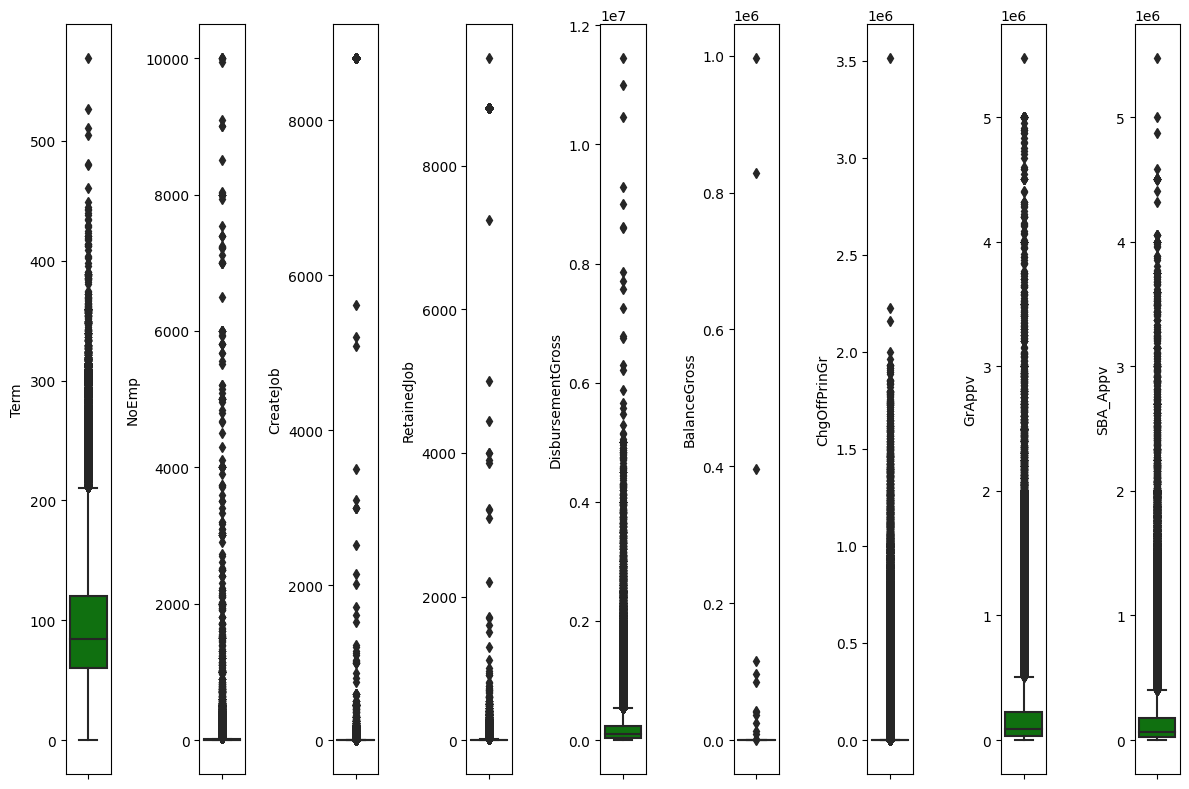

In [141]:
# Membuat box plot untuk setiap kolom numerik, untuk melihat adanya outlier
plt.figure(figsize=(12, 8))
for i in range(0,len(numerik)):
    plt.subplot(1, len(numerik), i+1)
    sns.boxplot(y = df_SBA[numerik[i]],color='green', orient ='v')
    plt.tight_layout()

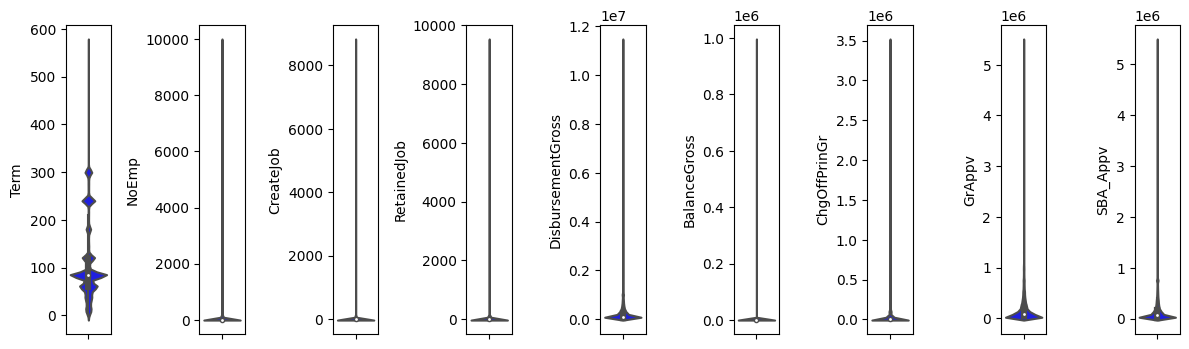

In [142]:
#melihat distribusi pada violin plot
plt.figure(figsize=(12,20))
for i in range(0,len(numerik)):
    plt.subplot(6,9,i+1)
    sns.violinplot(y=df_SBA[numerik[i]],color='blue',orient='v')
    plt.tight_layout()

Dari grafik yang dihasilkan, terdapat Outliers yang cukup banyak untuk data numerik, dengan jumlah cukup yang besar dan jauh. diperlukan Preprocessing data untuk handling outliers


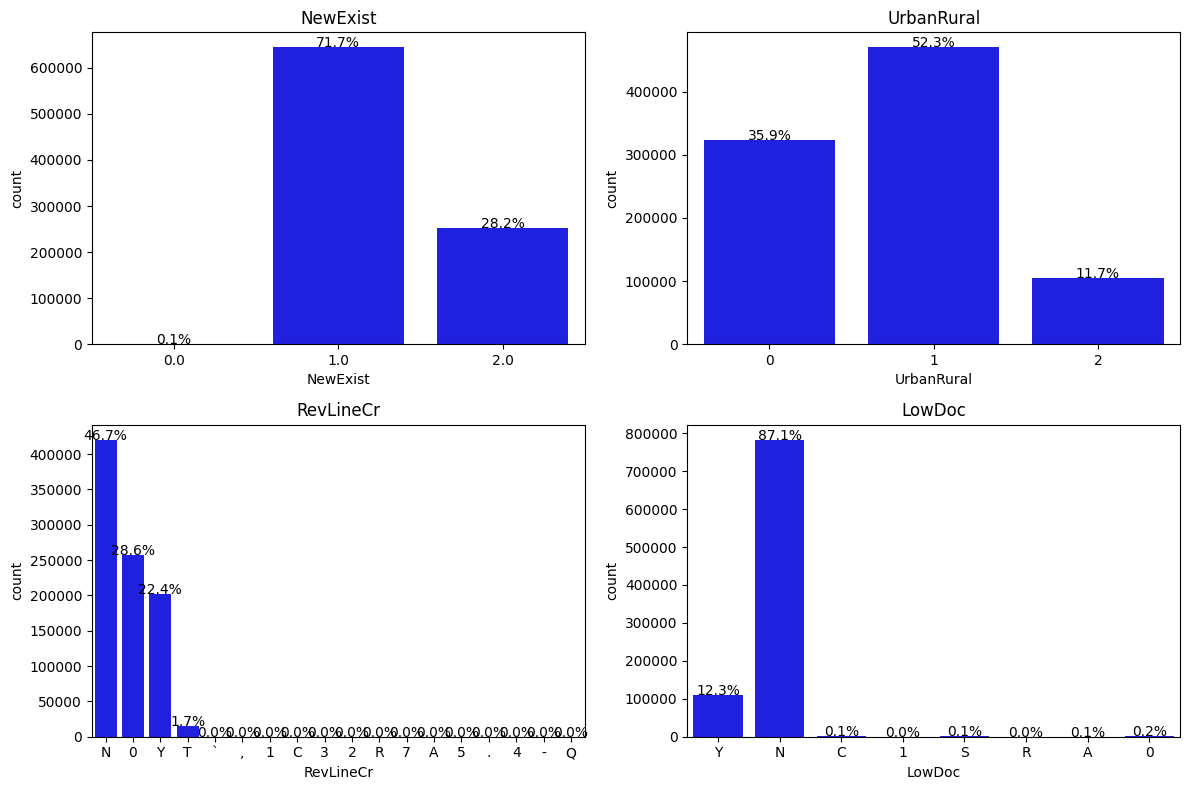

In [143]:
#visualisasi data kategoris
plt.figure(figsize=(12, 8))
selected_columns = ['NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc']

for i in range(len(selected_columns)):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=selected_columns[i], data=df_SBA, color='blue')
    plt.title(selected_columns[i])

    # Menambahkan label persentase pada setiap bar
    total = len(df_SBA)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

plt.tight_layout()
plt.show()


dapat dilihat terdapat value yang tidak sesuai dengan deskripsi dataset sehingga diperlukan handling eror value

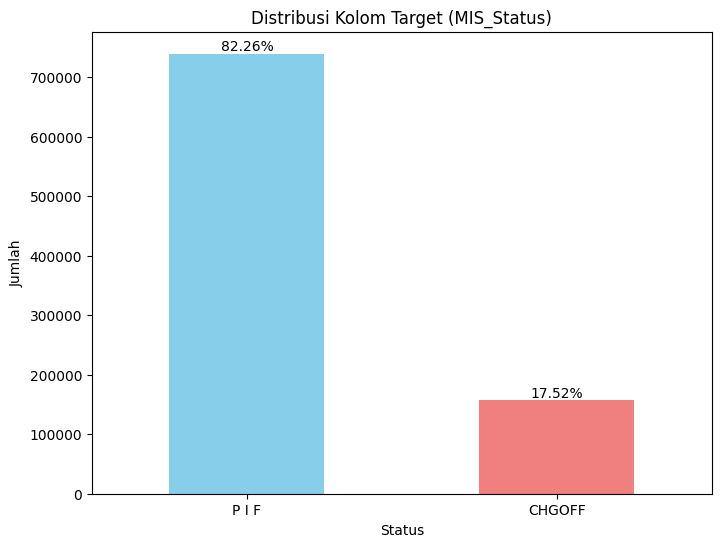

In [144]:
# Visualisasi distribusi kolom target 'MIS_Status'
plt.figure(figsize=(8, 6))
value_counts = df_SBA['MIS_Status'].value_counts()
ax = value_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribusi Kolom Target (MIS_Status)')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Menambahkan angka persentase pada bar
total_data = len(df_SBA)
for i, v in enumerate(value_counts):
    percentage = (v / total_data) * 100
    ax.text(i, v, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

garfik menunjukkan feature target memiliki value dengan PIF (tidak gagal bayar) sebanyak 82,26% dan ChargeOff (gagal bayar) sebanyak 17,52%

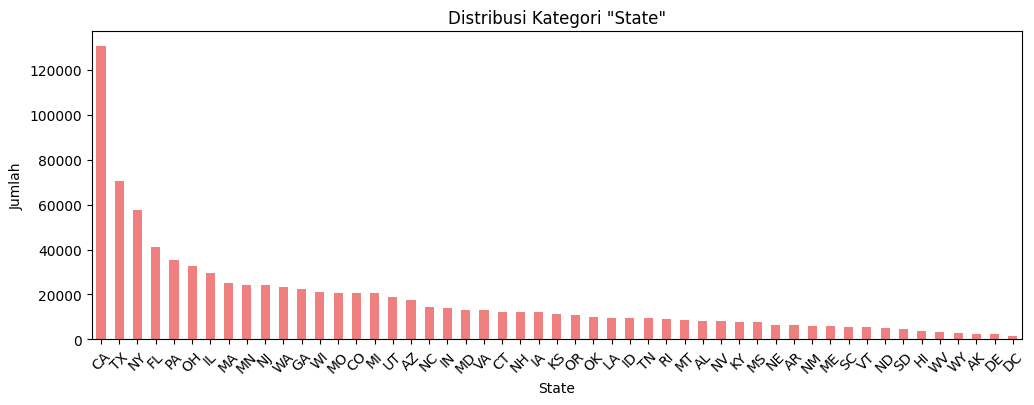

In [145]:
# Visualisasi kolom kategorikal 'State'
plt.figure(figsize=(12, 4))
df_SBA['State'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribusi Kategori "State"')
plt.xlabel('State')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

grafik tersebut memperlihatkan keberadaan start-up di setiap negara bagian di amerika, negara bagian CA (California) menduduki peringkat pertama yang mengajukan pinjaman ke pihak SBA dengan lebih dari 120.000 start-up, dilanjut dengan negara Texas yang menjadi urutan ke 2 sebagai negara bagian yang mengajukan pinjaman ke pihak SBA, kemudian di lanjut dengan negara bagian NewYork.

## MULTIVARIATE ANALYSIS

In [146]:
# Menghitung matriks korelasi
corr_matrix = df_SBA.corr()
corr_matrix

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,1.000000,0.027956,-0.060822,-0.199720,0.099793,0.009032,-0.040024,-0.022095,-0.023463,0.046296,-0.148337,0.057165,0.000585,-0.058625,0.068952,0.077252
Zip,0.027956,1.000000,-0.034026,-0.044713,0.146074,0.014157,-0.038853,0.003632,0.003674,0.011398,-0.072798,0.092365,-0.000265,0.010097,0.099452,0.105817
NAICS,-0.060822,-0.034026,1.000000,0.499462,-0.111024,-0.038237,0.047053,-0.039376,-0.036587,0.027800,0.436724,-0.047576,-0.000072,0.029633,-0.056521,-0.063106
ApprovalFY,-0.199720,-0.044713,0.499462,1.000000,-0.292727,-0.054390,0.037060,-0.067027,-0.060415,-0.015778,0.738115,-0.053241,0.001536,0.053159,-0.086731,-0.105676
Term,0.099793,0.146074,-0.111024,-0.292727,1.000000,0.046140,-0.073100,0.027581,0.024931,0.028940,-0.204080,0.466391,0.001701,-0.047319,0.502610,0.524912
NoEmp,0.009032,0.014157,-0.038237,-0.054390,0.046140,1.000000,-0.040222,0.008626,0.015350,0.006376,-0.041824,0.088651,-0.000122,0.007800,0.090430,0.092566
NewExist,-0.040024,-0.038853,0.047053,0.037060,-0.073100,-0.040222,1.000000,-0.002130,-0.009128,0.124152,0.031701,-0.074405,0.001355,0.018502,-0.066506,-0.063976
CreateJob,-0.022095,0.003632,-0.039376,-0.067027,0.027581,0.008626,-0.002130,1.000000,0.993953,0.001038,-0.029924,0.006955,-0.000057,0.009378,0.008182,0.013749
RetainedJob,-0.023463,0.003674,-0.036587,-0.060415,0.024931,0.015350,-0.009128,0.993953,1.000000,-0.000515,-0.024851,0.010274,-0.000080,0.010632,0.010693,0.014891
FranchiseCode,0.046296,0.011398,0.027800,-0.015778,0.028940,0.006376,0.124152,0.001038,-0.000515,1.000000,-0.003776,0.059574,-0.000201,0.025386,0.067896,0.069442


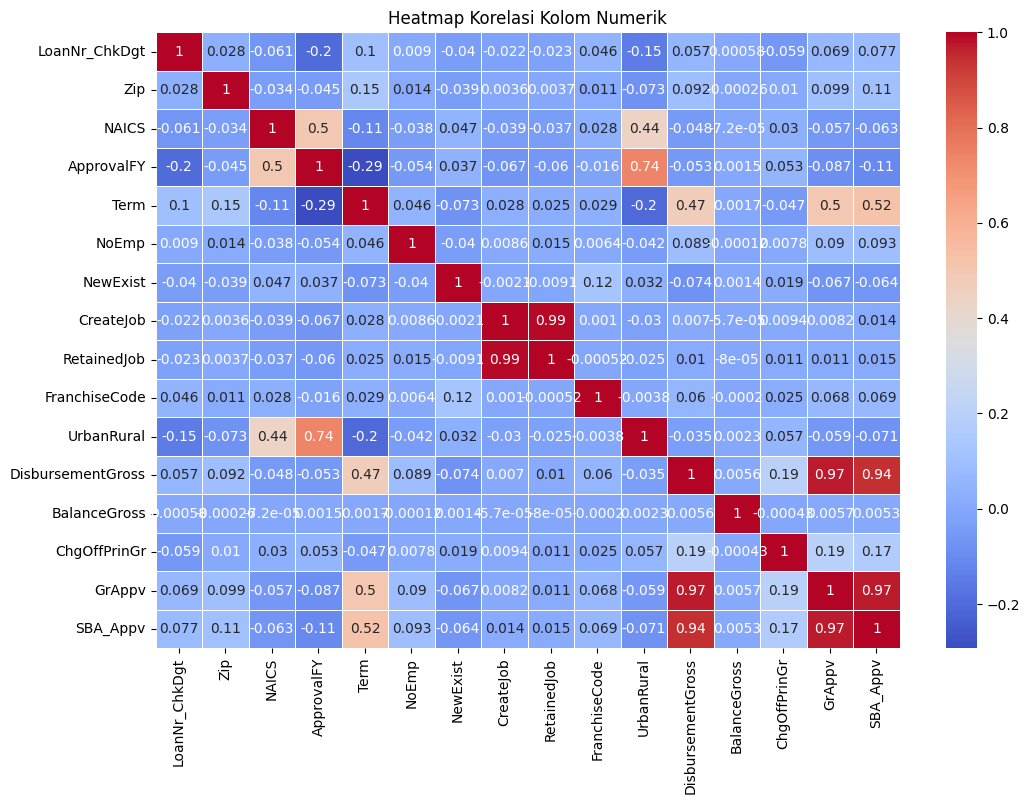

In [147]:
# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

tidak dapat dilihat korelasi masing masing feature dan label karena MIS_Status sebagai target memiliki tipe data kategorik (PIF dan CHGOFF) diperlukan pengkoden label encoder pada saat preprocessing untuk mengganti nilai-nilai kategori menjadi nilai numerik agar dapat digunakan dalam perhitungan statistik seperti korelasi Pearson (Hitung korelasi antara setiap fitur numerik (misalnya, "Term," "NoEmp," "DisbursementGross," dll.) dan label "MIS_Status") dan Uji Chi-Sqaure (Hitung uji chi-squared antara setiap fitur kategorik (misalnya, "NewExist," "UrbanRural," "RevLineCr," "LowDoc," dll.) dan label "MIS_Status.")

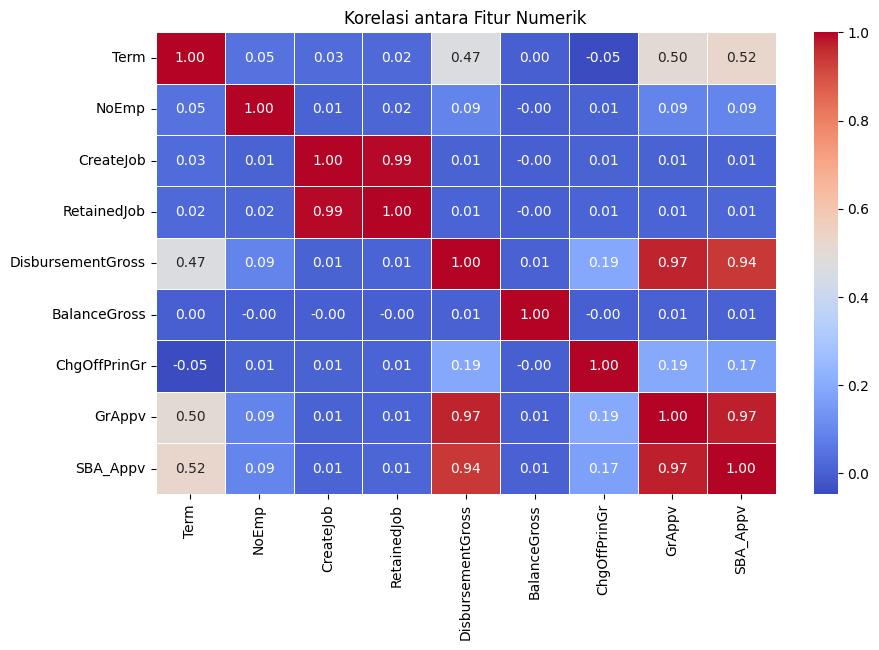

In [148]:
# Korelasi antara fitur numerik
correlation_matrix = df_SBA[numerik].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Fitur Numerik')
plt.show()

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
Berdasarkan korelasi antara fitur numerik, terlihat variabel yang memiliki korelasi tinggi dengan variabel lain:

"GrAppv" dan "SBA_Appv" memiliki korelasi tinggi (0,97).

"DisbursementGross" dan "GrAppv" memiliki korelasi tinggi (0.97).

"DisbursementGross" dan "SBA_Appv" memiliki korelasi tinggi (0.94).

"RetrainJob" dan "CreateJob" memiliki korelasi tinggi (0.99).

"Term" memiliki korelasi yang tinggi dengan "DisbursementGross" (0,47).

"Term" memiliki korelasi yang tinggi dengan "GrAppv" (0,50).

"Term" memiliki korelasi yang tinggi dengan "SBA_Appv" (0,52).

Jika korelasi tinggi antara variabel-variabel tersebut mengindikasikan multikolinearitas. Untuk menghindari multikolinearitas, perlu mempertimbangkan untuk menghapus salah satu dari pasangan-pasangan ini.

untuk sementara, kami mengambil keputusan untuk menghapus "GrAppv", "DisbursementGross" dan "RetrainJob".

namun, diperlukan uji ANOVA untuk melihat korelasi data numerik dengan data target(kategorik) MIS_Status

Text(0, 0.5, 'Jumlah Pinjaman ($)')

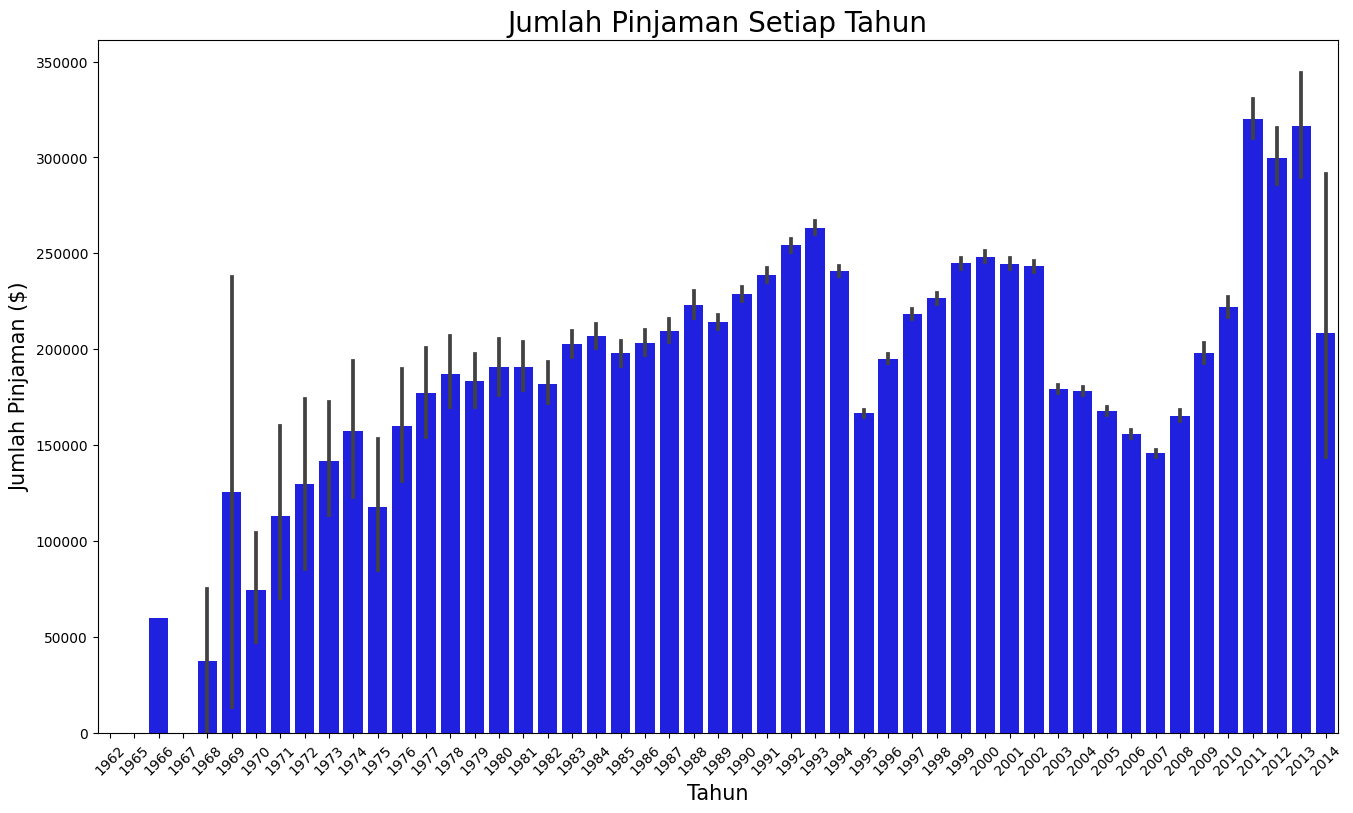

In [149]:
#Membuat plot jumlah pinjaman setiap tahunya
f, ax = plt.subplots(figsize=(16,9))
sns.barplot(x="ApprovalFY", y="DisbursementGross", color='blue', data=df_SBA)
plt.title('Jumlah Pinjaman Setiap Tahun', fontsize=20)
plt.xlabel('Tahun', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pinjaman ($)', fontsize=15)

Grafik di atas adalah jumlah pinjaman yang diberikan bank setiap tahunya kepada pengusaha. Dapan dilihat bahwa ada beberapa kali penurunan pada tahun 1994 dan 2007.

<Figure size 1000x500 with 0 Axes>

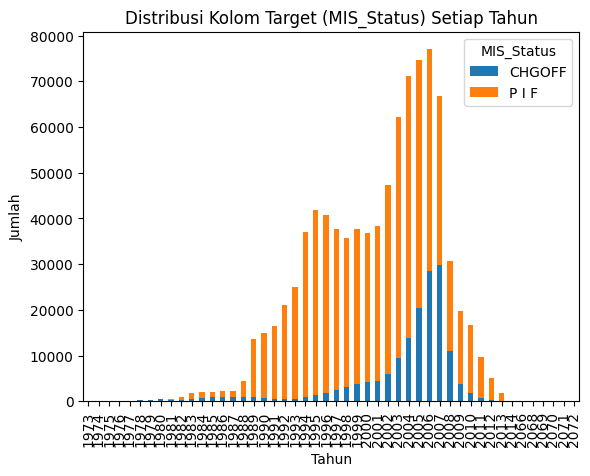

In [150]:
# Konversi kolom 'ApprovalDate' ke tipe data datetime
df_SBA['ApprovalDate'] = pd.to_datetime(df_SBA['ApprovalDate'])

# Ekstrak tahun dari kolom 'ApprovalDate'
df_SBA['Year'] = df_SBA['ApprovalDate'].dt.year

# Visualisasi distribusi kolom target 'MIS_Status' setiap tahun
plt.figure(figsize=(10, 5))
df_SBA.groupby(['Year', 'MIS_Status']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribusi Kolom Target (MIS_Status) Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend(title='MIS_Status')
plt.xticks(rotation=90)
plt.show()

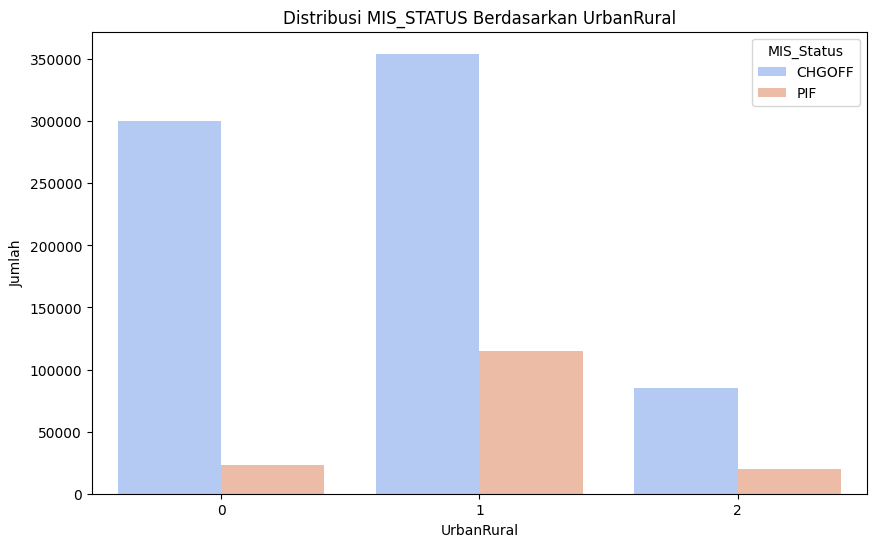

In [151]:

# Visualisasi data MIS_STATUS berdasarkan UrbanRural
plt.figure(figsize=(10, 6))
sns.countplot(data=df_SBA, x='UrbanRural', hue='MIS_Status', palette='coolwarm')
plt.title('Distribusi MIS_STATUS Berdasarkan UrbanRural')
plt.xlabel('UrbanRural')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='MIS_Status', labels=['CHGOFF', 'PIF'])
plt.savefig('plot.jpg')

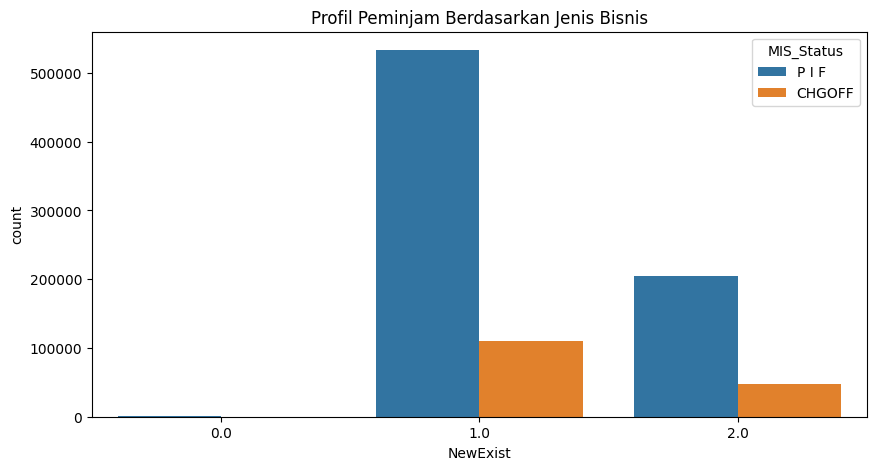

In [152]:

# visualisasi profil peminjam berdasarkan jenis bisnis
plt.figure(figsize=(10, 5))
sns.countplot(x='NewExist', hue='MIS_Status', data=df_SBA)
plt.title('Profil Peminjam Berdasarkan Jenis Bisnis')
plt.show()


<Figure size 1000x600 with 0 Axes>

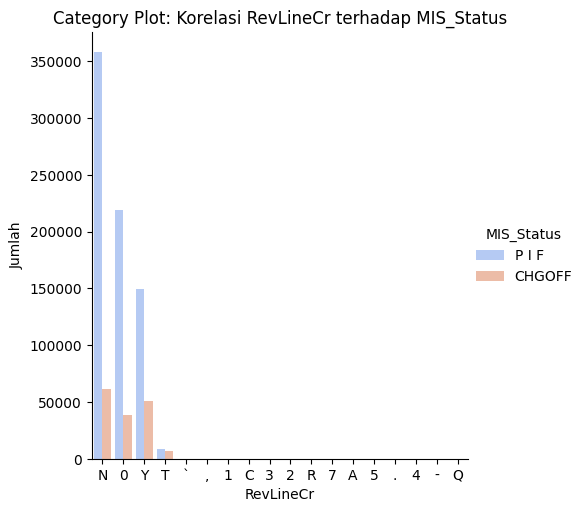

In [153]:
# Visualisasi category plot antara 'RevLineCr' dan 'MIS_Status'
plt.figure(figsize=(10, 6))
sns.catplot(data=df_SBA, x='RevLineCr', hue='MIS_Status', kind='count', palette='coolwarm')
plt.title('Category Plot: Korelasi RevLineCr terhadap MIS_Status')
plt.xlabel('RevLineCr')
plt.ylabel('Jumlah')
plt.show()

<Figure size 1000x600 with 0 Axes>

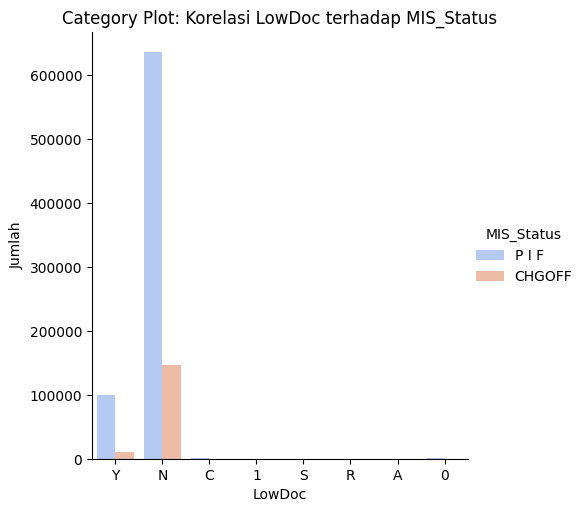

In [154]:
# Visualisasi category plot antara 'LowDoc' dan 'MIS_Status'
plt.figure(figsize=(10, 6))
sns.catplot(data=df_SBA, x='LowDoc', hue='MIS_Status', kind='count', palette='coolwarm')
plt.title('Category Plot: Korelasi LowDoc terhadap MIS_Status')
plt.xlabel('LowDoc')
plt.ylabel('Jumlah')
plt.show()

## **03 Insights and Visualization**

* Analisis tren tahunan persetujuan pinjaman dapat membantu bisnis dalam merencanakan strategi pemberian pinjaman.
* menilai risiko dan peluang terkait dengan bisnis yang mengajukan pinjaman dari berbagai faktor yang berkorelasi.
* Memahami perbedaan tingkat keberhasilan pinjaman di ketiga lingkungan SBA (urban, rural, dan undefined) dapat membantu SBA mengambil pendekatan yang berbeda dalam mendukung bisnis di ketiga lingkungan ini.



























































































































































































































































































































































































# STAGE 2

## IMPORT LIBRARY

In [1]:
#import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import datetime
import math
from scipy import stats
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


#Imbalance Dataset
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

#modeling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


## LOAD DATA

In [2]:
#load data
df_SBA = pd.read_csv('/content/sample_data/SBAnational.csv')

#syntax untuk menampilkan semua kolom dataset
pd.set_option('display.max_columns', 28)

<ipython-input-2-8b5b767dbfc8>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_SBA = pd.read_csv('/content/sample_data/SBAnational.csv')


In [3]:
df_SBA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
#menampilkan informasi kolom beserta tipe data yang digunakan dalam dataset
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [5]:
#menghilangkan simbol dollar
df_SBA['DisbursementGross'] = df_SBA['DisbursementGross'].str.replace('$','')
df_SBA['BalanceGross'] = df_SBA['BalanceGross'].str.replace('$','')
df_SBA['ChgOffPrinGr'] = df_SBA['ChgOffPrinGr'].str.replace('$','')
df_SBA['GrAppv'] = df_SBA['GrAppv'].str.replace('$','')
df_SBA['SBA_Appv'] = df_SBA['SBA_Appv'].str.replace('$','')

<ipython-input-5-dfdec50da124>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_SBA['DisbursementGross'] = df_SBA['DisbursementGross'].str.replace('$','')
<ipython-input-5-dfdec50da124>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_SBA['BalanceGross'] = df_SBA['BalanceGross'].str.replace('$','')
<ipython-input-5-dfdec50da124>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_SBA['ChgOffPrinGr'] = df_SBA['ChgOffPrinGr'].str.replace('$','')
<ipython-input-5-dfdec50da124>:5: FutureWarning: The default value of re

In [6]:
#menghilangkan koma
df_SBA['DisbursementGross'] = df_SBA['DisbursementGross'].str.replace(',','')
df_SBA['BalanceGross'] = df_SBA['BalanceGross'].str.replace(',','')
df_SBA['ChgOffPrinGr'] = df_SBA['ChgOffPrinGr'].str.replace(',','')
df_SBA['GrAppv'] = df_SBA['GrAppv'].str.replace(',','')
df_SBA['SBA_Appv'] = df_SBA['SBA_Appv'].str.replace(',','')

In [7]:
#mengubah tipe data ke float
df_SBA['DisbursementGross'] = df_SBA['DisbursementGross'].astype(float)
df_SBA['BalanceGross'] = df_SBA['BalanceGross'].astype(float)
df_SBA['ChgOffPrinGr'] = df_SBA['ChgOffPrinGr'].astype(float)
df_SBA['GrAppv'] = df_SBA['GrAppv'].astype(float)
df_SBA['SBA_Appv'] = df_SBA['SBA_Appv'].astype(float)

In [8]:
#Mengubah tipe data ke date
df_SBA['ApprovalDate'] = pd.to_datetime(df_SBA['ApprovalDate'])
df_SBA['ChgOffDate'] = pd.to_datetime(df_SBA['ChgOffDate'])
df_SBA['DisbursementDate'] = pd.to_datetime(df_SBA['DisbursementDate'])

In [9]:
#Merubah kolom ApprovalFY menjadi integer, walaupun sebenrnya dia adalah tahun, tapi agar lebih mudah
df_SBA['ApprovalFY'].replace('1976A', 1976, inplace=True)
df_SBA['ApprovalFY']= df_SBA['ApprovalFY'].astype(int)

In [10]:
#informasi dataset setelah dilakukan perubahan tipe data
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  int64         
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

In [11]:
#melihat ukuran data
df_SBA.shape

(899164, 27)

In [12]:
#melihat jumlah missing value setiap kolom
missing_values = df_SBA.isnull().sum()
missing_values

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [13]:
#missing value (Persentase)
missing_values = df_SBA.isnull().sum()
total_rows = len(df_SBA)
persentase_missing = (missing_values / total_rows) * 100
persentase_missing

LoanNr_ChkDgt         0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.503579
LowDoc                0.287156
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64

In [14]:
#pengelompokkan kolom berdasarkan jenisnya
# Data Kategoris
kategoris = [
    'LoanNr_ChkDgt',
    'Name',
    'City',
    'State',
    'Zip',
    'Bank',
    'BankState',
    'NAICS',
    'NewExist',
    'FranchiseCode',
    'UrbanRural',
    'RevLineCr',
    'LowDoc',
    'MIS_Status'
]

# Data Numerik
numerik = [
    'Term',
    'NoEmp',
    'CreateJob',
    'RetainedJob',
    'DisbursementGross',
    'BalanceGross',
    'ChgOffPrinGr',
    'GrAppv',
    'SBA_Appv'
]

# Data Timestamp
timestamp = [
    'ApprovalDate',
    'ApprovalIFY',
    'ChgOffDate',
    'DisbursementDate'
]

# Data Geolokasi
geolokasi = [
    'City',
    'State',
    'Zip',
    'BankState'
]


In [15]:
#melihat jumlah tiap kategori
for col in kategoris :
  print (f'''value count kolom {col}:''')
  print (df_SBA[col].value_counts())
print()

value count kolom LoanNr_ChkDgt:
1000014003    1
5944984007    1
5944874009    1
5944884001    1
5944904005    1
             ..
3072874001    1
3072875008    1
3072885000    1
3072886007    1
9996003010    1
Name: LoanNr_ChkDgt, Length: 899164, dtype: int64
value count kolom Name:
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
Mohammad N. Hassan (epc) for C       1
N.J. Yellow Tale Flower              1
CEF INC.                             1
SCANNELL AND ASSOCIATES LP           1
PACIFIC TRADEWINDS FAN & LIGHT       1
Name: Name, Length: 779583, dtype: int64
value count kolom City:
LOS ANGELES                       11558
HOUSTON                           10247
NEW YORK                           7846
CHICAGO                            6036
MIAMI                              5594
                       

## FEATURE ENCODING

In [16]:
# merubah input yang tidak sesuai dikolOM menjadi NaN
df_SBA['LowDoc'] = np.where((df_SBA['LowDoc'] != 'N') & (df_SBA['LowDoc'] != 'Y'), np.nan, df_SBA.LowDoc)
df_SBA['LowDoc'] = df_SBA['LowDoc'].replace({'N': 0, 'Y':1})
df_SBA.LowDoc.value_counts()

0.0    782822
1.0    110335
Name: LowDoc, dtype: int64

In [17]:
# merubah input yang tidak sesuai di Kolom RevLineCr dengan menganggapnya sebagai NaN
df_SBA['RevLineCr'] = np.where((df_SBA['RevLineCr'] != 'N') & (df_SBA['RevLineCr'] != 'Y'), np.nan, df_SBA.RevLineCr)
df_SBA['RevLineCr'] = df_SBA['RevLineCr'].replace({'N': 0, 'Y':1})
df_SBA.RevLineCr.value_counts()

0.0    420288
1.0    201397
Name: RevLineCr, dtype: int64

In [18]:

# Mengganti nilai yang tidak sesuai dengan NaN
df_SBA['NewExist'] = df_SBA['NewExist'].replace({1.0: 1, 2.0: 2, 0.0: np.nan})

# Mengubah tipe data kolom menjadi integer
df_SBA['NewExist'] = df_SBA['NewExist'].astype(float).astype('Int64')

In [19]:
df_SBA.NewExist.value_counts()

1    644869
2    253125
Name: NewExist, dtype: Int64

In [20]:
df_SBA['NewExist'] = df_SBA['NewExist'].replace({1.0: 0, 2.0:1})
df_SBA.NewExist.value_counts()

0    644869
1    253125
Name: NewExist, dtype: Int64

In [21]:
#Kolom UrbanRural sudah sesuai, tidak ada yang perlu di ubah. Kita hanya ingin meliat isinya seperti apa
df_SBA.UrbanRural.value_counts()

1    470654
0    323167
2    105343
Name: UrbanRural, dtype: int64

In [22]:
#missing value (Persentase)
missing_values = df_SBA.isnull().sum()
total_rows = len(df_SBA)
persentase_missing = (missing_values / total_rows) * 100
persentase_missing

LoanNr_ChkDgt         0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.130121
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr            30.859665
LowDoc                0.668065
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64

terdapat penambahan missing valeu pada feature NewExist, RevLineCr dan LowDoc

## feature extraction

1. membuat kolom baru Is_Franchise = ada tidaknya franchise

In [23]:
#Ubah kolom FranchiseCode menjadi kategorical jika kolom FranchiseCode = 0 atau = 1 maka dia tidak ada franchise, selain itu maka dia ada franchise
df_SBA['FranchiseCode'] = np.where((df_SBA['FranchiseCode'] == 0) | (df_SBA['FranchiseCode'] == 1), "Tidak Ada Franchise", "Ada Franchise")
df_SBA.FranchiseCode.value_counts()

Tidak Ada Franchise    847389
Ada Franchise           51775
Name: FranchiseCode, dtype: int64

In [24]:
df_SBA['FranchiseCode'] = df_SBA['FranchiseCode'].replace({"Tidak Ada Franchise": 0, "Ada Franchise": 1})
df_SBA.rename(columns={"FranchiseCode": "Is_Franchised"}, inplace=True)
df_SBA.Is_Franchised.value_counts()

0    847389
1     51775
Name: Is_Franchised, dtype: int64

2. membuat kolom baru Is_CreateJob = pekerjaan telah dibuat atau tidak

In [25]:
#Pada kolom CreateJob ubah menjadi categorcal
#jika 0 maka dia tidak membuat job, jika > 0 maka dia membuat job
df_SBA['CreateJob'] = np.where((df_SBA.CreateJob > 0 ),1,df_SBA.CreateJob)
df_SBA.rename(columns={"CreateJob": "Is_CreatedJob"}, inplace=True)
df_SBA.Is_CreatedJob.value_counts()

0    629248
1    269916
Name: Is_CreatedJob, dtype: int64

3. membuat kolom baru Is_RetainedJob = memiliki karyawan

In [26]:
#jika 0 maka dia tidak memiliki karyawan tetap, maka jika >0 maka dia memiliki karyawan
df_SBA['RetainedJob'] = np.where((df_SBA.RetainedJob > 0 ),1,df_SBA.RetainedJob)
df_SBA.rename(columns={"RetainedJob": "Is_RetainedJob"}, inplace=True)
df_SBA.Is_RetainedJob.value_counts()

1    458761
0    440403
Name: Is_RetainedJob, dtype: int64

4. membuat kolom baru RealEstate = ada tidaknya properti sebagai jaminan

In [27]:
#ini berdasarkan guideline, jika 20 tahun atau diatasnya maka dia dibackup dengan properti jika kurang, maka sebaliknya
df_SBA['RealEstate'] = df_SBA['Term'].apply(lambda x: 1 if x >= 240 else 0)
df_SBA.RealEstate.value_counts()
#Kolom 'RealEstate' akan memiliki nilai 1 jika nilai dalam kolom 'Term' adalah 240 atau lebih (20 tahun atau lebih), dan akan memiliki nilai 0 jika kurang dari 240 (kurang dari 20 tahun)

0    747007
1    152157
Name: RealEstate, dtype: int64

5. Membuat kolom baru StateSame = peminjam tinggal di kota yang sama dengan bank

In [28]:
## StateSame -> State = BankState
## Jika sama -> 1, jika tidak -> 0
df_SBA['StateSame'] = np.where(df_SBA['State'] == df_SBA['BankState'], 1, 0)

df_SBA.StateSame.value_counts()

1    473940
0    425224
Name: StateSame, dtype: int64

6. Membuat kolom baru DaysToDisbursement = Lama hari pencairan pinjaman

In [29]:
# DaysToDisbursement -> DisbursementDate - ApprovalDate
df_SBA['DaysToDisbursement'] = df_SBA['DisbursementDate'] - df_SBA['ApprovalDate']
df_SBA[['DaysToDisbursement']].sample(2)

,DaysToDisbursement
250985,102 days
57805,201 days


In [30]:
# Menghapus value days pada kolom DaysToDisbursement
df_SBA['DaysToDisbursement'] = df_SBA['DaysToDisbursement'].astype(str)
df_SBA['DaysToDisbursement'] = df_SBA['DaysToDisbursement'].apply(lambda x: x[:x.index('d')-1] if 'days' in x else x)

In [31]:
df_SBA[['DaysToDisbursement']].sample(2)

,DaysToDisbursement
375076,82
485878,24


7. Membuat kolom baru DisbursementYear = tahun dari tanggal pencairan

In [32]:
# Mengambil value tahun saja pada kolom DisbursementDate
df_SBA['DisbursementYear'] = df_SBA['DisbursementDate'].dt.year

# Lalu filter hanya tahun 1987-2014 saja
df_SBA = df_SBA[(df_SBA['DisbursementYear'] >=1987) & (df_SBA['DisbursementYear'] <=2014)]

df_SBA.DisbursementYear.value_counts()

2006.0    79309
2005.0    74771
2004.0    70208
2007.0    68945
2003.0    59058
2002.0    45519
1995.0    44241
1997.0    40737
1999.0    39804
2000.0    39757
1996.0    37648
2001.0    37309
2008.0    37290
1998.0    35275
1994.0    30775
1993.0    22281
2009.0    21756
1992.0    19589
2010.0    16757
1991.0    15702
1990.0    14461
1989.0    11786
2011.0    11399
2012.0     5766
2013.0     2366
1987.0     2176
1988.0     2066
2014.0      234
Name: DisbursementYear, dtype: int64

8. membuat kolom baru Recession = perusahaan ini aktif pada masa resesi

In [33]:
#Kita akan membuat kolom baru yakni 'Recession'
#kolom ini berisi apakah si perusahaan ini aktif pada masa resesi dari (1 des 2007 - 30 jun 2009)
#jika aktif maka 1, jika tidak maka 0

#Pertama buat kolom perhitungan untuk merubah Kolom Term menjadi Daysterm dan kolom Active dengan menambahkan kolom
#Daysterm dengan kolom DisbursementDate
df_SBA['DaysTerm'] =  df_SBA['Term']*30
df_SBA['Active'] = df_SBA['DisbursementDate'] + pd.TimedeltaIndex(df_SBA['DaysTerm'], unit='D')

#Kedua kita aka membuat kolom Recession
startdate = datetime.datetime.strptime('2007-12-1', "%Y-%m-%d").date()
enddate = datetime.datetime.strptime('2009-06-30', "%Y-%m-%d").date()
df_SBA['Recession'] = df_SBA['Active'].apply(lambda x: 1 if startdate <= x <= enddate else 0)

<ipython-input-33-7269c9517025>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SBA['DaysTerm'] =  df_SBA['Term']*30
<ipython-input-33-7269c9517025>:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_SBA['Recession'] = df_SBA['Active'].apply(lambda x: 1 if startdate <= x <= enddate else 0)


In [34]:
df_SBA.Recession.value_counts()

0    815977
1     71008
Name: Recession, dtype: int64

9. membuat kolom baru SectorName = nama nama industri yang meminjam

In [35]:
#Menangani kolom NAICS, kita akan meerubahnya menjadi nama sektornya dan membuat kolom rate default setiap sektornya
#Berdasarkan guideline, dua  digit di awal adalah kode industrinya
ind_code = df_SBA['NAICS']

#Fungsi untuk mengambil ambil 2 digit awal dari kodenya
def get_code(ind_code):
    if ind_code <= 0:
        return 0
    return (ind_code // 10 ** (int(math.log(ind_code, 10)) - 1))

#Merubah 2 digit menjadi nama sektor
def sector_name(i):
    def_code = {11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 23:'Constuction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
                42:'Wholesale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance',
                53:'Real Estate, Rental & Leasing', 54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise',
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 72:'Accomodation & Food Service',
                81:'Other Servieces (Ex: Public Administration)', 92:'Public Administration'
               }
    if i in def_code:
        return def_code[i]

In [36]:
#Membuat kolom baru yaitu ind_code
df_SBA['ind_code'] = df_SBA.NAICS.apply(get_code)

#Membuat kolom baru yaitu Sector_name
df_SBA['Sector_name'] = df_SBA.ind_code.apply(sector_name)


In [37]:
#Melihat kolom NAICS, ind_code, Sector_rate, Sector_name untuk memastikan sudah benar atau belum
df_SBA[['NAICS','ind_code', 'Sector_name']].head()

,NAICS,ind_code,Sector_name
0,451120,45,Retail Trade
1,722410,72,Accomodation & Food Service
2,621210,62,Health Care & Social Assistance
3,0,0,None
4,0,0,None


10. Membuat kolom baru SBA_AppvPct = Persentase pinjaman yang dijamin SBA

In [38]:
## SBA_AppvPct -> SBA_Appv / GrAppv
df_SBA['SBA_AppvPct'] = df_SBA['SBA_Appv'] / df_SBA['GrAppv']

## Kemudian cek kolomnya
df_SBA[['SBA_Appv', 'GrAppv', 'SBA_AppvPct']].sample(2)

,SBA_Appv,GrAppv,SBA_AppvPct
120250,3000.0,6000.0,0.5
245763,37500.0,75000.0,0.5


11. Membuat kolom baru AppvDisbursed = pinjaman dicairkan atau tidak

In [39]:
## AppvDisbursed -> DisbursementGross = GrAppv
## Jika ya -> 1, jika tidak -> 0
df_SBA['AppvDisbursed'] = np.where(df_SBA['DisbursementGross'] == df_SBA['GrAppv'], 1, 0)

## Kemudian cek kolomnya
df_SBA.AppvDisbursed.value_counts()

1    677815
0    209170
Name: AppvDisbursed, dtype: int64

In [40]:
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886985 entries, 0 to 899163
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       886985 non-null  int64         
 1   Name                886971 non-null  object        
 2   City                886985 non-null  object        
 3   State               886973 non-null  object        
 4   Zip                 886985 non-null  int64         
 5   Bank                885653 non-null  object        
 6   BankState           885647 non-null  object        
 7   NAICS               886985 non-null  int64         
 8   ApprovalDate        886985 non-null  datetime64[ns]
 9   ApprovalFY          886985 non-null  int64         
 10  Term                886985 non-null  int64         
 11  NoEmp               886985 non-null  int64         
 12  NewExist            885838 non-null  Int64         
 13  Is_CreatedJob       886985 no

## handling missing value

In [41]:
#Kita akan menghilangkan input yang kosong pad kolom NewExist dengan menggunakan kolom Is_Frenchised
#kita berasumsi jika Is_Franchised = 0 maka dia New Business, karena biasanya usaha baru tidak punya Franchise
#jika Is_Franchised = 1 maka dia existing business,kemungkinan dia punya franchise
# sekarang kita cek asumsi kita, apakah benar dengan melihat perbandingan dua kolom tersebut
df_SBA[['NewExist', 'Is_Franchised']].head(10)

,NewExist,Is_Franchised
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,0
7,1,0
8,1,0
9,1,0
10,1,0


ternyata asumsi kita salah, sehingga, kita akan drop saja input yang kosong ini, selain asumsi kita salah dan juga input yang kosong terbilang sangat kecil dibanding dengan total jumlah data kita

In [42]:
#Kita akan mencoba mengisi input yang kosong pada kolom LowDoc
#berdasrkan guideline, jika pinjaman < 150.000 maka dia 'Yes' dan jika pinjaman > 150.000 maka dia 'No'
# dan juga ada beberap input yang kami jadikan Nan jika diluar 'Yes' dan 'No'
#untuk mengisinya, kita akan menggunakan kolom DisbursementGross

df_SBA['LowDoc'] = np.where((df_SBA['LowDoc'] == np.nan) & (df_SBA['DisbursementGross'] < 150000),1,df_SBA.LowDoc)
df_SBA['LowDoc'] = np.where((df_SBA['LowDoc'] == np.nan) & (df_SBA['DisbursementGross'] >= 150000),0,df_SBA.LowDoc)

df_SBA = df_SBA[(df_SBA['LowDoc'] == 0) | (df_SBA['LowDoc'] == 1)]

In [43]:
#Kita cek lagi kolom LowDoc untuk memastikan
df_SBA.LowDoc.value_counts()

0.0    770720
1.0    110300
Name: LowDoc, dtype: int64

In [44]:
# Mengisi input yang kosong pada MIS_Status dengan menggunakan kolom ChgOffDate
# Jika terdapat tanggal di ChgOffDate, maka statusnya CHGOFF, jika tidak maka statusnya P I F
df_SBA['MIS_Status'] = np.where((df_SBA['MIS_Status'] == 0.0) & (df_SBA['ChgOffDate'].isna()), 'P I F', df_SBA['MIS_Status'])
df_SBA['MIS_Status'] = np.where((df_SBA['MIS_Status'] == 1.0) & (~df_SBA['ChgOffDate'].isna()), 'CHGOFF', df_SBA['MIS_Status'])


In [45]:
#Kita cek lagi apakah sudah benar kolom MIS_Status dengan ChgOffDate
print(df_SBA[['MIS_Status', 'ChgOffDate']].head(10))

   MIS_Status ChgOffDate
0       P I F        NaT
1       P I F        NaT
2       P I F        NaT
3       P I F        NaT
4       P I F        NaT
5       P I F        NaT
7       P I F        NaT
8       P I F        NaT
9       P I F        NaT
10      P I F        NaT


In [46]:
#missing value (Persentase)
missing_values = df_SBA.isnull().sum()
total_rows = len(df_SBA)
persentase_missing = (missing_values / total_rows) * 100
persentase_missing

LoanNr_ChkDgt          0.000000
Name                   0.001589
City                   0.000000
State                  0.001362
Zip                    0.000000
Bank                   0.150961
BankState              0.151642
NAICS                  0.000000
ApprovalDate           0.000000
ApprovalFY             0.000000
Term                   0.000000
NoEmp                  0.000000
NewExist               0.129168
Is_CreatedJob          0.000000
Is_RetainedJob         0.000000
Is_Franchised          0.000000
UrbanRural             0.000000
RevLineCr             31.376473
LowDoc                 0.000000
ChgOffDate            82.345577
DisbursementDate       0.000000
DisbursementGross      0.000000
BalanceGross           0.000000
MIS_Status             0.202947
ChgOffPrinGr           0.000000
GrAppv                 0.000000
SBA_Appv               0.000000
RealEstate             0.000000
StateSame              0.000000
DaysToDisbursement     0.000000
DisbursementYear       0.000000
DaysTerm

Terdapat pengurangan missing value pada feature City, LowDoc, DisbursementDate dan MIS_Status dikarenakan pembatasan data dan pengisian data missing value dari feature lain

In [47]:
#Lakukan cleansing missing value pada kolom name, state, bank,
#bankState, NewExist, RevlineCr, Sector_name, MIS_Status

df_SBA.dropna(subset=['Name', 'State', 'Bank', 'BankState', 'NewExist',
                       'RevLineCr', 'Sector_name', 'MIS_Status'
                      ], inplace=True)

## Lalu cek kembali null values nya
df_SBA.isnull().sum()

LoanNr_ChkDgt              0
Name                       0
City                       0
State                      0
Zip                        0
Bank                       0
BankState                  0
NAICS                      0
ApprovalDate               0
ApprovalFY                 0
Term                       0
NoEmp                      0
NewExist                   0
Is_CreatedJob              0
Is_RetainedJob             0
Is_Franchised              0
UrbanRural                 0
RevLineCr                  0
LowDoc                     0
ChgOffDate            355759
DisbursementDate           0
DisbursementGross          0
BalanceGross               0
MIS_Status                 0
ChgOffPrinGr               0
GrAppv                     0
SBA_Appv                   0
RealEstate                 0
StateSame                  0
DaysToDisbursement         0
DisbursementYear           0
DaysTerm                   0
Active                     0
Recession                  0
ind_code      

In [48]:
#missing value (Persentase) SETELAH CLEANING MISSING VALUE
missing_values = df_SBA.isnull().sum()
total_rows = len(df_SBA)
persentase_missing = (missing_values / total_rows) * 100
persentase_missing

LoanNr_ChkDgt          0.000000
Name                   0.000000
City                   0.000000
State                  0.000000
Zip                    0.000000
Bank                   0.000000
BankState              0.000000
NAICS                  0.000000
ApprovalDate           0.000000
ApprovalFY             0.000000
Term                   0.000000
NoEmp                  0.000000
NewExist               0.000000
Is_CreatedJob          0.000000
Is_RetainedJob         0.000000
Is_Franchised          0.000000
UrbanRural             0.000000
RevLineCr              0.000000
LowDoc                 0.000000
ChgOffDate            77.857512
DisbursementDate       0.000000
DisbursementGross      0.000000
BalanceGross           0.000000
MIS_Status             0.000000
ChgOffPrinGr           0.000000
GrAppv                 0.000000
SBA_Appv               0.000000
RealEstate             0.000000
StateSame              0.000000
DaysToDisbursement     0.000000
DisbursementYear       0.000000
DaysTerm

## handling duplicate

In [49]:
duplicates = df_SBA[df_SBA.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [LoanNr_ChkDgt, Name, City, State, Zip, Bank, BankState, NAICS, ApprovalDate, ApprovalFY, Term, NoEmp, NewExist, Is_CreatedJob, Is_RetainedJob, Is_Franchised, UrbanRural, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, DisbursementGross, BalanceGross, MIS_Status, ChgOffPrinGr, GrAppv, SBA_Appv, RealEstate, StateSame, DaysToDisbursement, DisbursementYear, DaysTerm, Active, Recession, ind_code, Sector_name, SBA_AppvPct, AppvDisbursed]
Index: []

[0 rows x 38 columns]


## Visualization


In [50]:
df_SBA

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,Is_CreatedJob,...,ChgOffPrinGr,GrAppv,SBA_Appv,RealEstate,StateSame,DaysToDisbursement,DisbursementYear,DaysTerm,Active,Recession,ind_code,Sector_name,SBA_AppvPct,AppvDisbursed
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,1,0,...,0.0,60000.0,48000.0,0,0,730,1999.0,2520,2006-01-22,0,45,Retail Trade,0.80,1
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,1,0,...,0.0,40000.0,32000.0,0,1,92,1997.0,1800,2002-05-05,0,72,Accomodation & Food Service,0.80,1
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,0,0,...,0.0,287000.0,215250.0,0,1,306,1997.0,5400,2012-10-13,0,62,Health Care & Social Assistance,0.75,1
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,1997,120,19,0,0,...,0.0,517000.0,387750.0,0,0,122,1997.0,3600,2007-05-09,0,33,Manufacturing,0.75,1
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,1997,84,1,1,0,...,0.0,45000.0,36000.0,0,0,487,1998.0,2520,2005-05-24,0,81,Other Servieces (Ex: Public Administration),0.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,9995233007,"M L B CONSTRUCTION, INC.",ELLICOTT,MD,21043,WELLS FARGO BANK NATL ASSOC,CA,233210,1997-02-27,1997,60,5,0,0,...,0.0,25000.0,12500.0,0,0,32,1997.0,1800,2002-03-05,0,23,Constuction,0.50,1
899146,9995263005,HILL AND SONS INC.,OAKLAND,CA,94603,MORTGAGE CAP. DEVEL CORP,CA,323111,1997-02-27,1997,240,8,0,1,...,0.0,189000.0,189000.0,1,1,167,1997.0,7200,2017-04-30,0,32,Manufacturing,1.00,1
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,314912,1997-02-27,1997,36,40,0,0,...,0.0,200000.0,150000.0,0,1,32,1997.0,1080,2000-03-15,0,31,Manufacturing,0.75,1
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,0,0,...,0.0,85000.0,42500.0,0,0,246,1997.0,1800,2002-10-05,0,45,Retail Trade,0.50,1


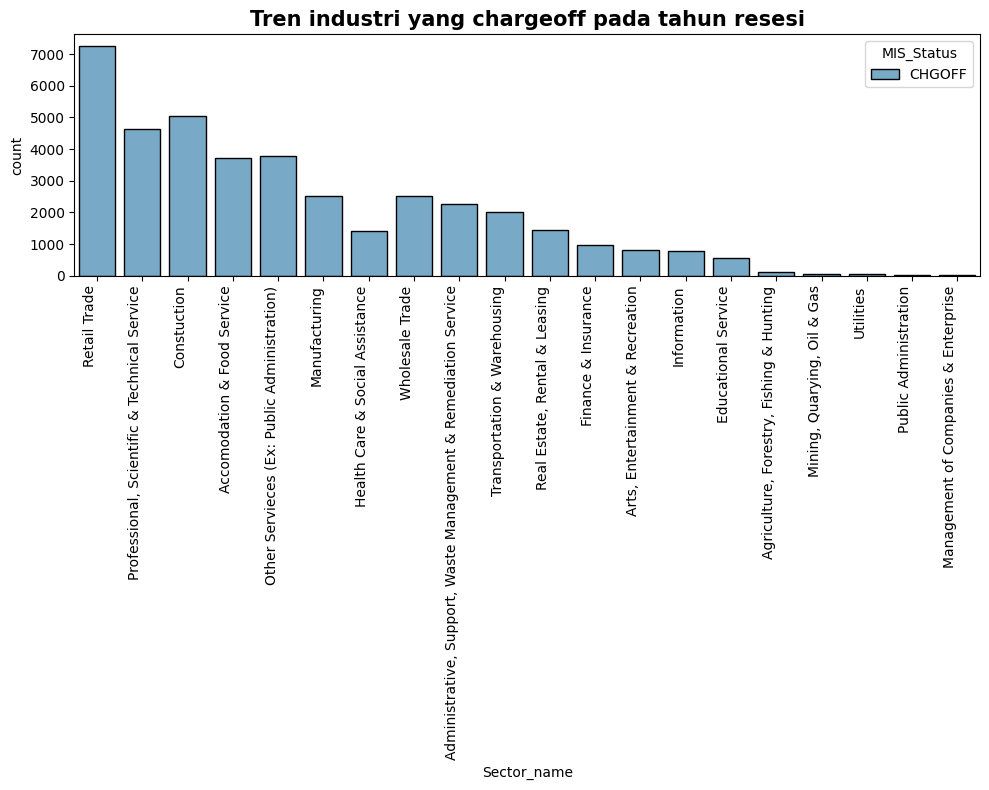

In [51]:
plt.figure(figsize=(10, 8))

sector_name_counts = df_SBA[(df_SBA['DisbursementDate'].dt.year >= 2007) & (df_SBA['DisbursementDate'].dt.year <= 2009)]['Sector_name'].value_counts().sort_values(ascending=False)

sns.countplot(data=df_SBA[(df_SBA['DisbursementDate'].dt.year >= 2007) & (df_SBA['DisbursementDate'].dt.year <= 2009)],
              x='Sector_name', hue='MIS_Status', hue_order=['CHGOFF'], palette='Blues',
              lw=1, ec='k', orient='v', order=sector_name_counts.index)

plt.title('Tren industri yang chargeoff pada tahun resesi', fontsize=15, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-52-b71b92206de3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_SBA, x='Term', hue='MIS_Status', palette=['blue', 'Red'], shade=True)


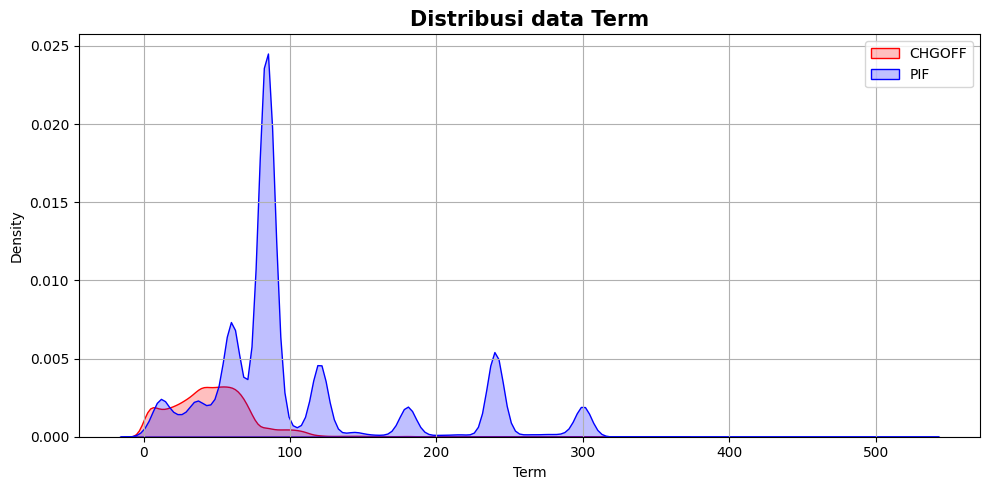

In [52]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=df_SBA, x='Term', hue='MIS_Status', palette=['blue', 'Red'], shade=True)

plt.title('Distribusi data Term', fontsize=15, fontweight='bold')
plt.legend(labels=['CHGOFF','PIF'])
plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-53-e0a7fb0b5a96>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_SBA, x='SBA_AppvPct', hue='MIS_Status', palette=['blue', 'Red'], shade=True)


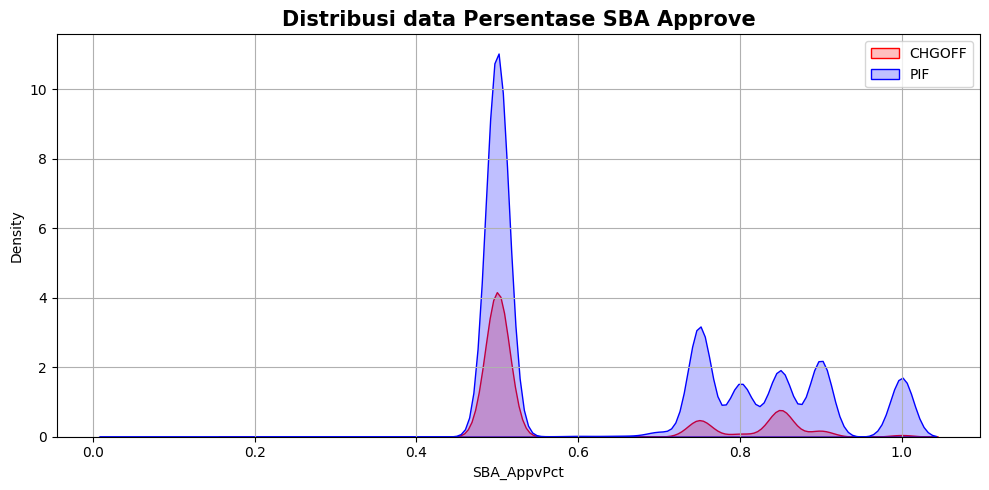

In [53]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=df_SBA, x='SBA_AppvPct', hue='MIS_Status', palette=['blue', 'Red'], shade=True)

plt.title('Distribusi data Persentase SBA Approve', fontsize=15, fontweight='bold')
plt.legend(labels=['CHGOFF','PIF'])
plt.grid()
plt.tight_layout()
plt.show()

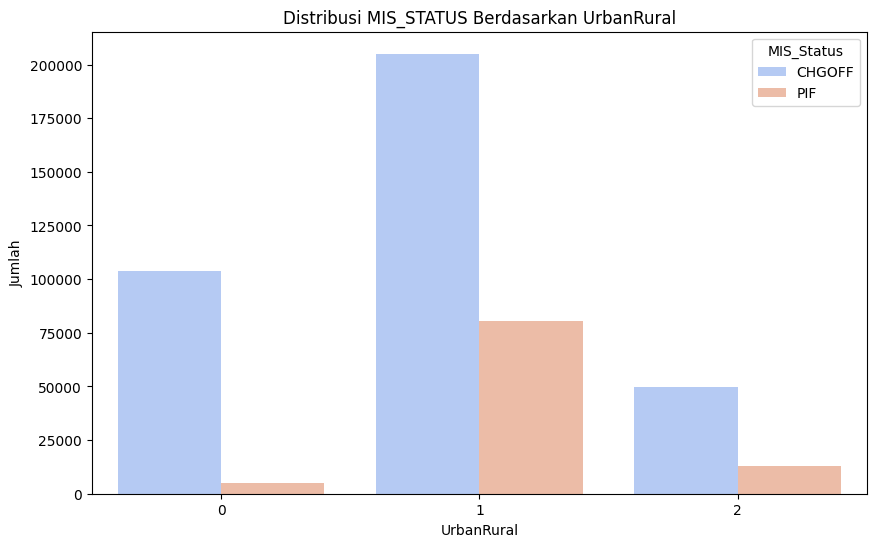

In [54]:
# Visualisasi data MIS_STATUS berdasarkan UrbanRural
plt.figure(figsize=(10, 6))
sns.countplot(data=df_SBA, x='UrbanRural', hue='MIS_Status', palette='coolwarm')
plt.title('Distribusi MIS_STATUS Berdasarkan UrbanRural')
plt.xlabel('UrbanRural')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='MIS_Status', labels=['CHGOFF', 'PIF'])
plt.savefig('plot.jpg')

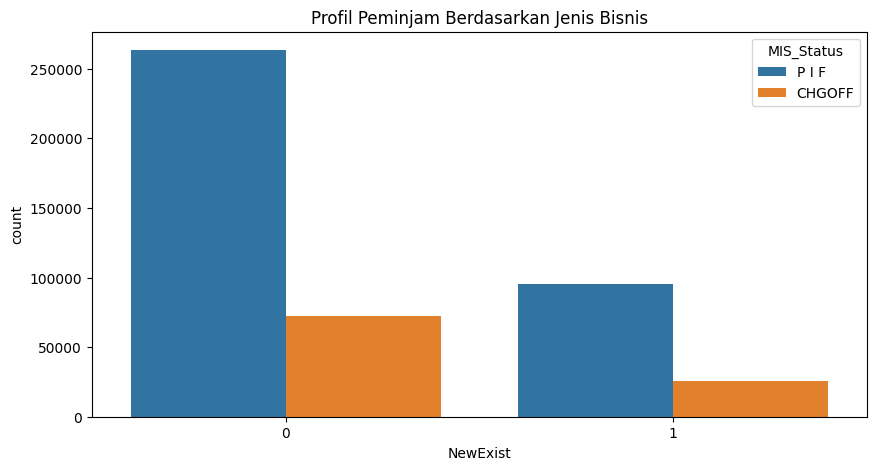

In [55]:
# visualisasi profil peminjam berdasarkan jenis bisnis
plt.figure(figsize=(10, 5))
sns.countplot(x='NewExist', hue='MIS_Status', data=df_SBA)
plt.title('Profil Peminjam Berdasarkan Jenis Bisnis')
plt.show()


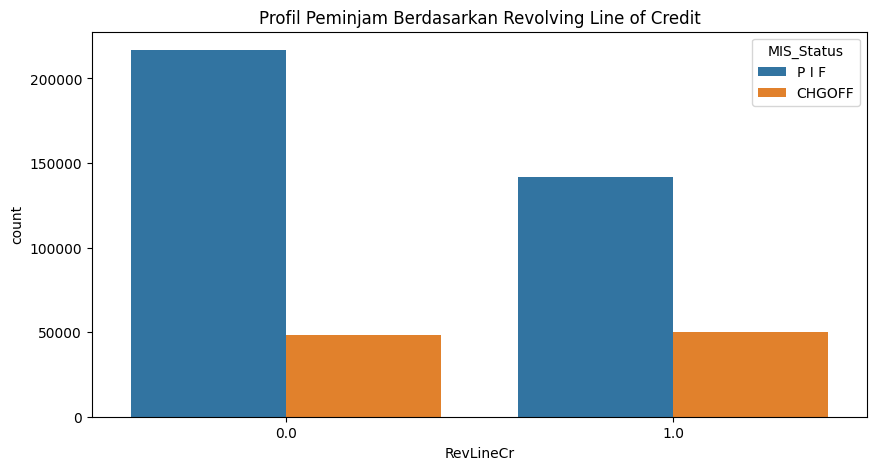

In [56]:
# visualisasi profil peminjam berdasarkan jenis bisnis
plt.figure(figsize=(10, 5))
sns.countplot(x='RevLineCr', hue='MIS_Status', data=df_SBA)
plt.title('Profil Peminjam Berdasarkan Revolving Line of Credit')
plt.show()


## feature selection

<ipython-input-57-8398596dc1a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_SBA.corr(), cmap='Blues', annot=True, fmt='.2f')


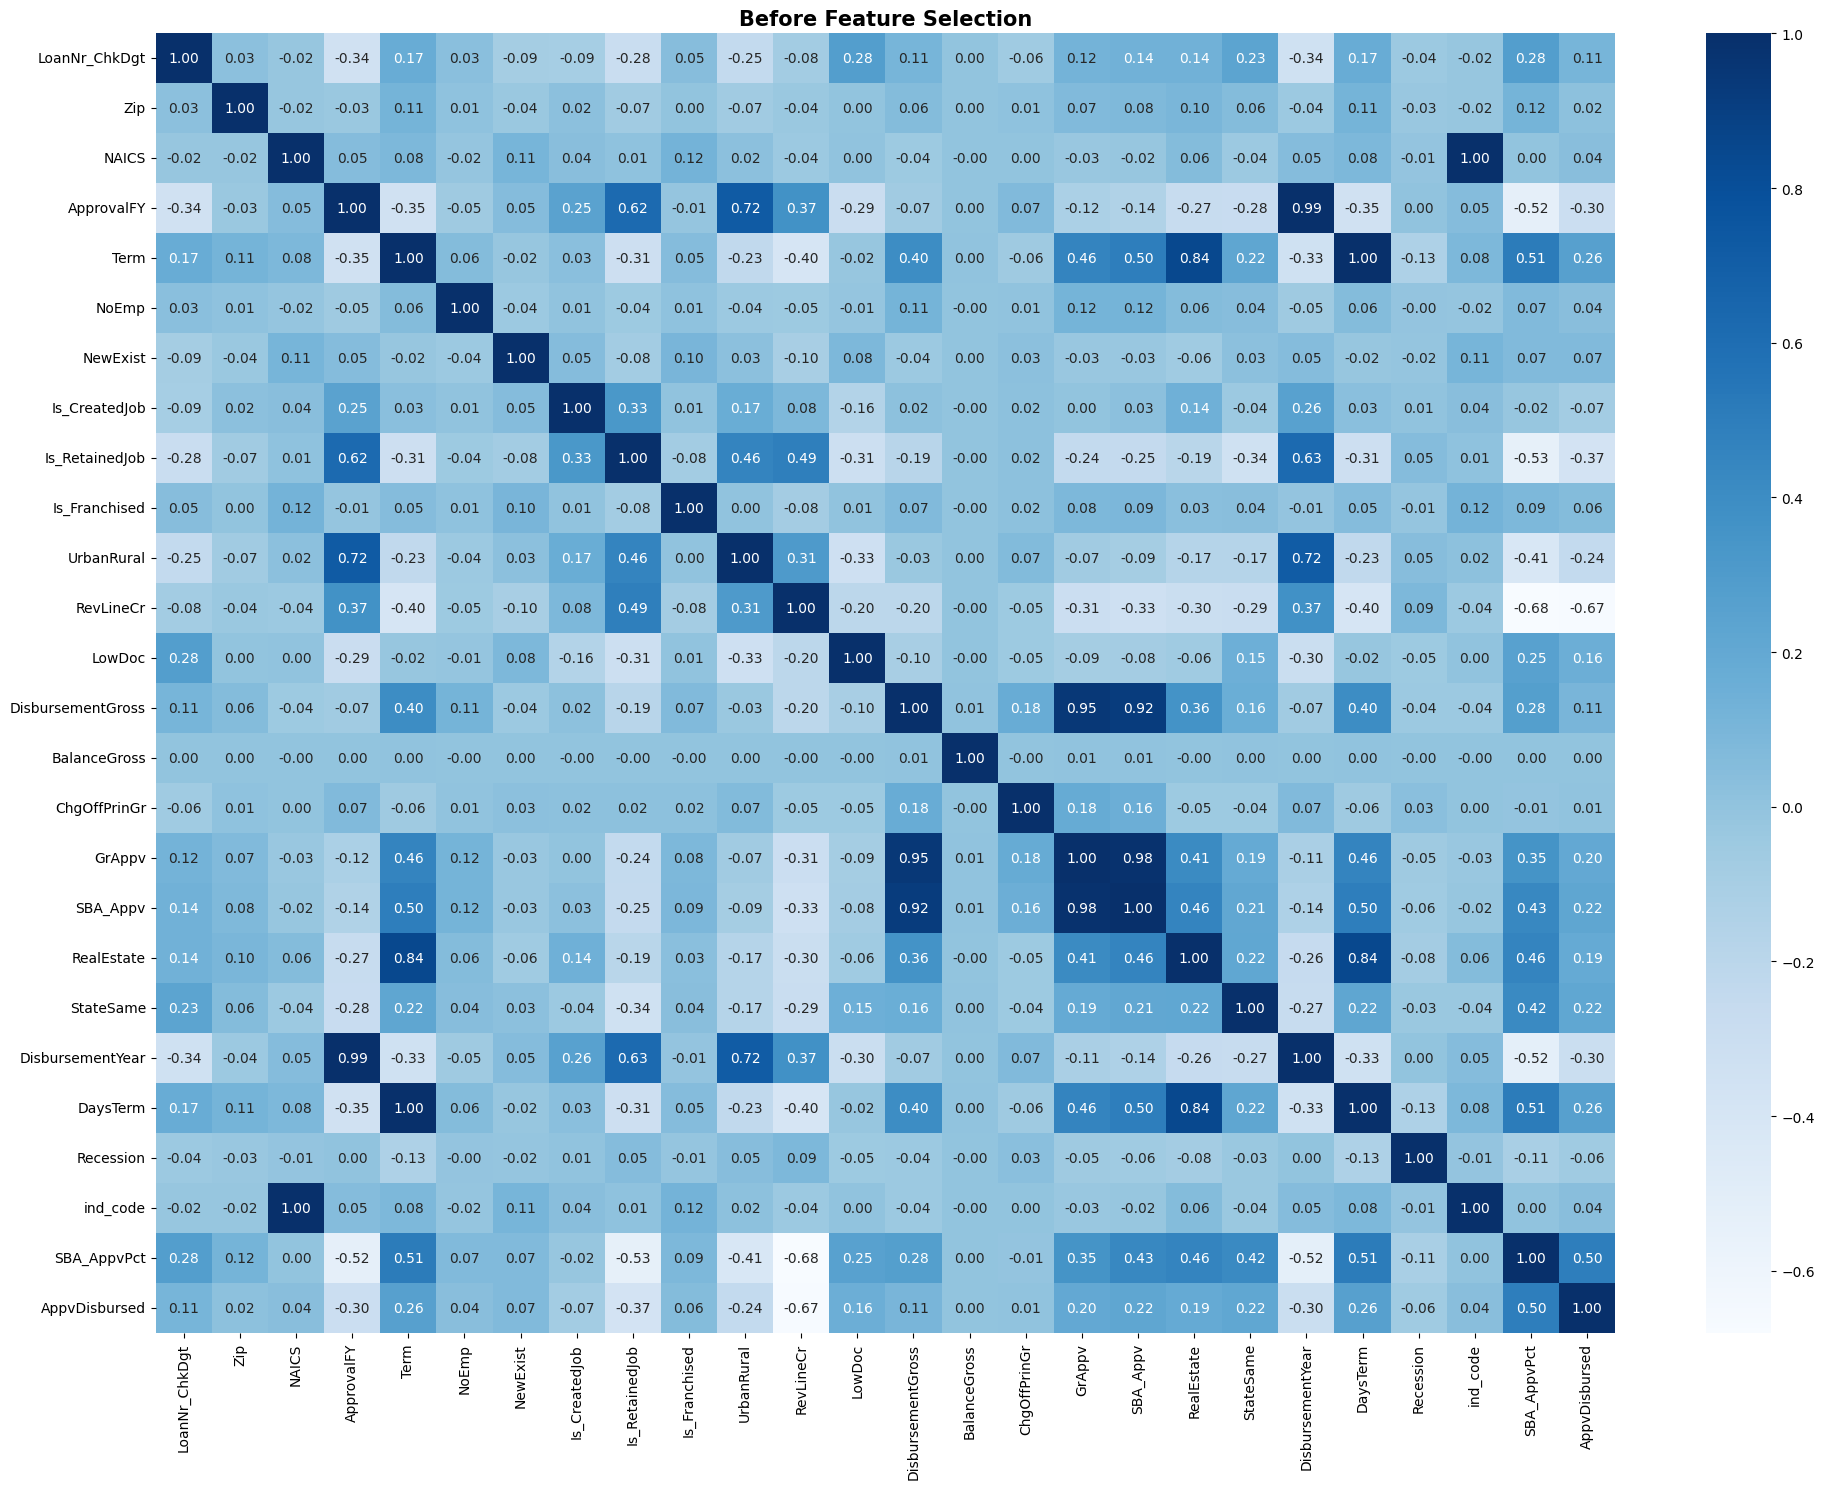

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(df_SBA.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Before Feature Selection', fontsize=15, fontweight='bold')
plt.tight_layout()

Alasan drop kolom:

1. 'LoanNr_ChkDgt' : Merupakan primary key, yang sudah diwakilkan oleh index
2. 'Name' : Memiliki kardinalitas yang cukup tinggi
3. 'City, Zip' : Memiliki kardinalitas yang cukup tinggi dan sudah terwakilkan dengan State
4. 'State, Bank, BankState' : Memiliki kardinalitas yang cukup tinggi dan sudah terwakilkan dengan StateSame
5. 'NAICS' : Memiliki kardinalitas cukup tinggi dan sudah digantikan dengan Sector_name
6. 'ApprovalDate, ApprovalFY' : Merupakan waktu pinjaman ketika disetujui sehingga tidak cocok untuk menjadi prediktor target
7. 'DisbursementDate' : Kolom tanggal pencairan tidak cocok untuk menjadi prediktor target
8. 'BalanceGross' : 80% memiliki angka 0, sehingga didrop saja
9. 'ChgOffPrinGr' : Kolom jumlah pinjaman yang dibebankan ketika chgoff sehingga tidak cocok untuk menjadi prediktor target
10. 'GrAppv, SBA_Appv' : Digantikan dengan SBA_AppvPct
11. 'Sector_name' : Memiliki kardinalitas yang cukup tinggi
12. 'DisbursementYear' : Tahun pencairan, tidak cocok menjadi prediktor target
13. 'FrenchiseCode' : kolom kode frenchise yang sudah digantikan dengan Is_Frenchise
14. 'CreateJob' : kolom kode frenchise yang sudah digantikan dengan Is_CreatJob
15. 'RetainedJob' : kolom kode frenchise yang sudah digantikan dengan Is_RetainedJob
16. 'DayTerm, Active' : kolom waktu pinjaman dalam jangka waktu peminjaman di masa resesi sehingga tidak cocok untuk prediktor
17. ChgOffDate memiliki missing values sebesar 81% sehingga lebih baik didrop saja
18. 'RealEstate' : memiliki korelasi yang tinggi dengan 'Term' sebesar 83% (redundan)

In [58]:
df_SBA.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'State', 'Bank', 'BankState', 'NAICS',
                     'ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr',
                     'GrAppv', 'SBA_Appv', 'DisbursementYear',
                     'Sector_name', 'DaysTerm', 'Active'],
            inplace=True)

In [59]:
df_SBA.drop(columns=['ChgOffDate','ind_code', 'RealEstate'],
            inplace=True)

In [60]:
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456936 entries, 0 to 899161
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Term                456936 non-null  int64  
 1   NoEmp               456936 non-null  int64  
 2   NewExist            456936 non-null  Int64  
 3   Is_CreatedJob       456936 non-null  int64  
 4   Is_RetainedJob      456936 non-null  int64  
 5   Is_Franchised       456936 non-null  int64  
 6   UrbanRural          456936 non-null  int64  
 7   RevLineCr           456936 non-null  float64
 8   LowDoc              456936 non-null  float64
 9   DisbursementGross   456936 non-null  float64
 10  MIS_Status          456936 non-null  object 
 11  StateSame           456936 non-null  int64  
 12  DaysToDisbursement  456936 non-null  object 
 13  Recession           456936 non-null  int64  
 14  SBA_AppvPct         456936 non-null  float64
 15  AppvDisbursed       456936 non-nul

<ipython-input-61-e8d73e199fc3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_SBA.corr(), cmap='Blues', annot=True, fmt='.2f')


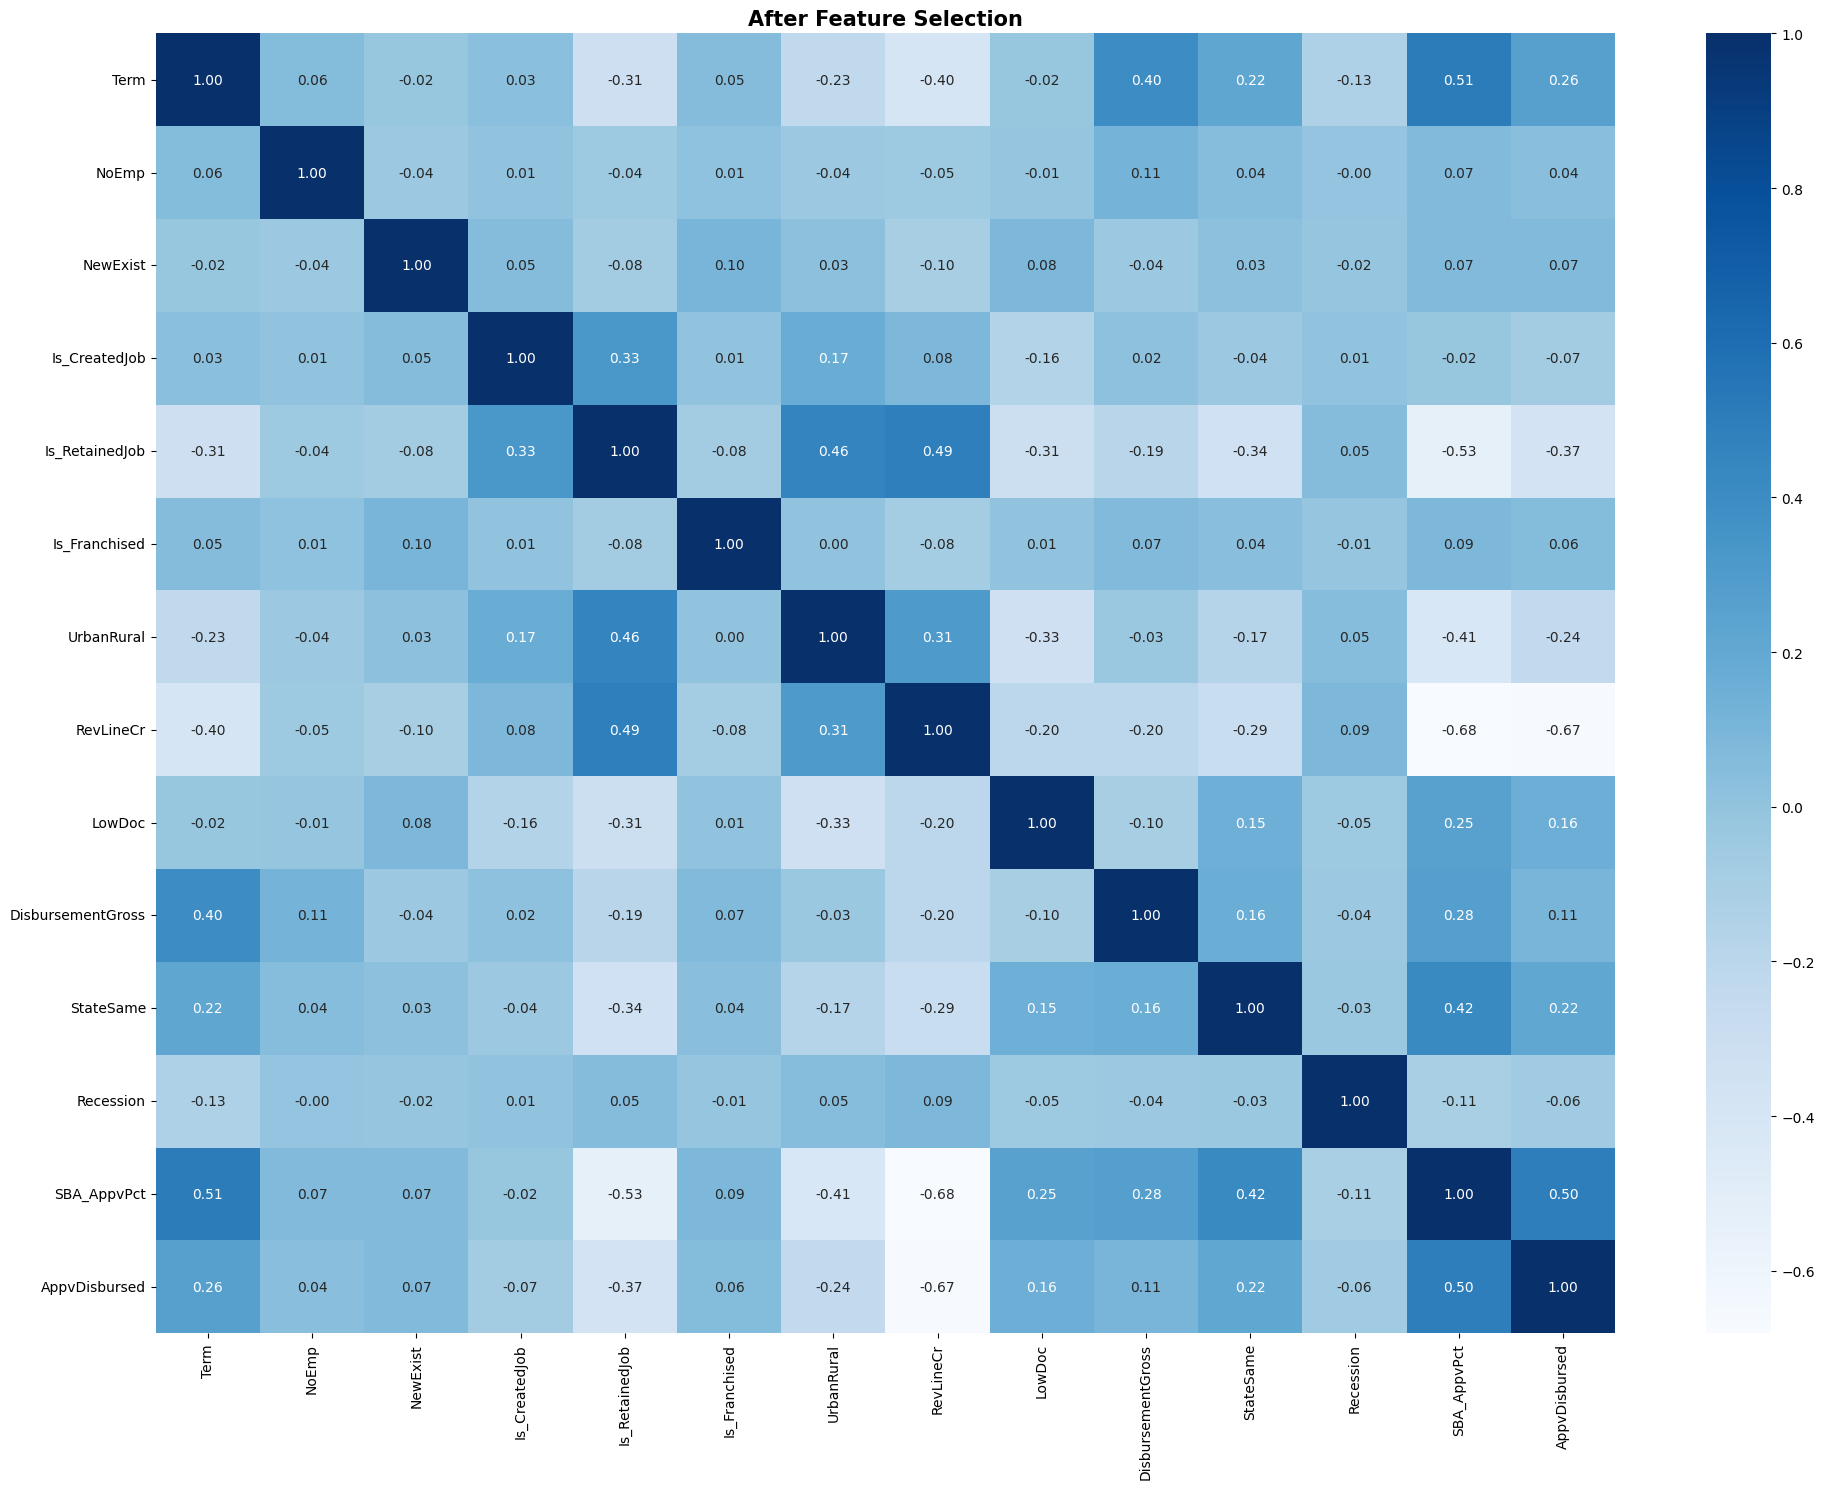

In [61]:
#melihat korelasi setelah drop kolom
plt.figure(figsize=(20,15))
sns.heatmap(df_SBA.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('After Feature Selection', fontsize=15, fontweight='bold')
plt.tight_layout()

In [62]:
df_SBA.head(3)

,Term,NoEmp,NewExist,Is_CreatedJob,Is_RetainedJob,Is_Franchised,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,StateSame,DaysToDisbursement,Recession,SBA_AppvPct,AppvDisbursed
0,84,4,1,0,0,0,0,0.0,1.0,60000.0,P I F,0,730,0,0.80,1
1,60,2,1,0,0,0,0,0.0,1.0,40000.0,P I F,1,92,0,0.80,1
2,180,7,0,0,0,0,0,0.0,0.0,287000.0,P I F,1,306,0,0.75,1


## Handling Outliers

In [63]:
features_transform = ['Term', 'DisbursementGross','NoEmp']

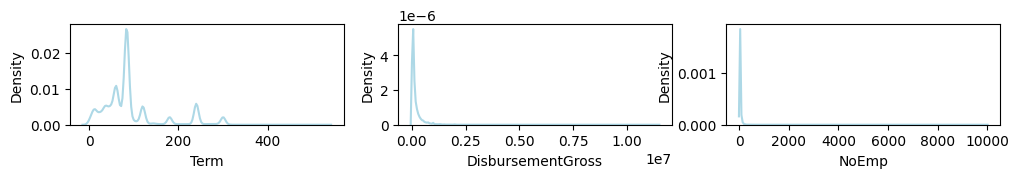

In [64]:
features = features_transform

plt.figure(figsize=(12,6))

for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(df_SBA[features[i]], color='lightblue')
    plt.xlabel(features[i])

In [65]:
# Menentukan Limit
def limit(i):
    Q1 = df_SBA[i].quantile(0.25)
    Q3 = df_SBA[i].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan upper limit biasa dan upper limit ekstrem
    lower_limit = df_SBA[i].quantile(0.25) - (IQR * 1.5)
    lower_limit_extreme = df_SBA[i].quantile(0.25) - (IQR * 3)
    upper_limit = df_SBA[i].quantile(0.75) + (IQR * 1.5)
    upper_limit_extreme = df_SBA[i].quantile(0.75) + (IQR * 3)
    print('Lower Limit:', lower_limit)
    print('Lower Limit Extreme:', lower_limit_extreme)
    print('Upper Limit:', upper_limit)
    print('Upper Limit Extreme:', upper_limit_extreme)

# Menghitung persentase outliers dari data
def percent_outliers(i):
    Q1 = df_SBA[i].quantile(0.25)
    Q3 = df_SBA[i].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan upper limit biasa dan upper limit ekstrem
    lower_limit = df_SBA[i].quantile(0.25) - (IQR * 1.5)
    lower_limit_extreme = df_SBA[i].quantile(0.25) - (IQR * 3)
    upper_limit = df_SBA[i].quantile(0.75) + (IQR * 1.5)
    upper_limit_extreme = df_SBA[i].quantile(0.75) + (IQR * 3)

    # Melihat persentase outliers terhadap total data
    print('Lower Limit: {} %'.format(df_SBA[(df_SBA[i] >= lower_limit)].shape[0] / df_SBA.shape[0] * 100))
    print('Lower Limit Extreme: {} %'.format(df_SBA[(df_SBA[i] >= lower_limit_extreme)].shape[0] / df_SBA.shape[0] * 100))
    print('Upper Limit: {} %'.format(df_SBA[(df_SBA[i] >= upper_limit)].shape[0] / df_SBA.shape[0] * 100))
    print('Upper Limit Extreme: {} %'.format(df_SBA[(df_SBA[i] >= upper_limit_extreme)].shape[0] / df_SBA.shape[0] * 100))


Text(0.5, 0, 'Jumlah')

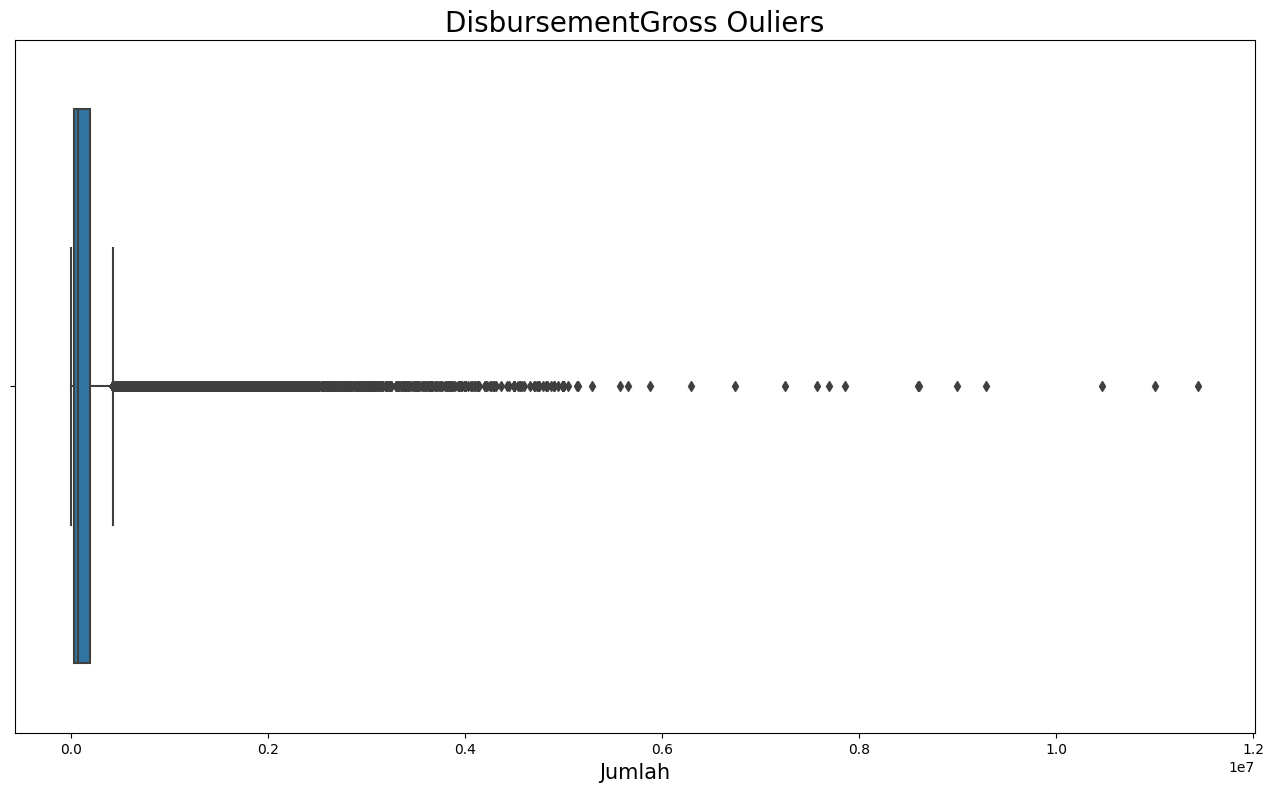

In [66]:
#Kita cek kolom DisbursemntGross
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df_SBA['DisbursementGross'])
plt.title('DisbursementGross Ouliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [67]:
#kita akan cek limit outliers dan berapa persen dari data kita yang melebihi limit tersebut
print(limit('DisbursementGross'))
print('-'*50)
print(percent_outliers('DisbursementGross'))

Lower Limit: -200500.0
Lower Limit Extreme: -436000.0
Upper Limit: 427500.0
Upper Limit Extreme: 663000.0
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extreme: 100.0 %
Upper Limit: 10.084125566818985 %
Upper Limit Extreme: 5.150830750914789 %
None


In [68]:
#karena terdapat 10 % dari jumlah data yang kita punya, maka saya coba merubah datanya dengan menggunakan
#log transformation, karena jika ouliers dihilangkan sangat banyak sekali data yang hilang (10%)
df_SBA['DisbursementGross'] = st.boxcox(df_SBA['DisbursementGross'])[0]
df_SBA['DisbursementGross'].skew()

0.007727432324961035

In [69]:
#kita akan cek limit outliers dan berapa persen dari data kita yang melebihi limit tersebut
print(limit('DisbursementGross'))
print('-'*50)
print(percent_outliers('DisbursementGross'))

Lower Limit: 6.809155389232779
Lower Limit Extreme: 5.274933822499891
Upper Limit: 10.900412900520479
Upper Limit Extreme: 12.434634467253368
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extreme: 100.0 %
Upper Limit: 0.050116427683526796 %
Upper Limit Extreme: 0.0 %
None


In [70]:
#ternyata masih ada sekitar 1% outliers, karena jumlahnya terbilang kecil, maka kita drop saja
outliers1_drop = df_SBA[(df_SBA['DisbursementGross'] > 14.718471616817471)].index
df_SBA.drop(outliers1_drop, inplace=True)

Text(0.5, 0, 'Jumlah')

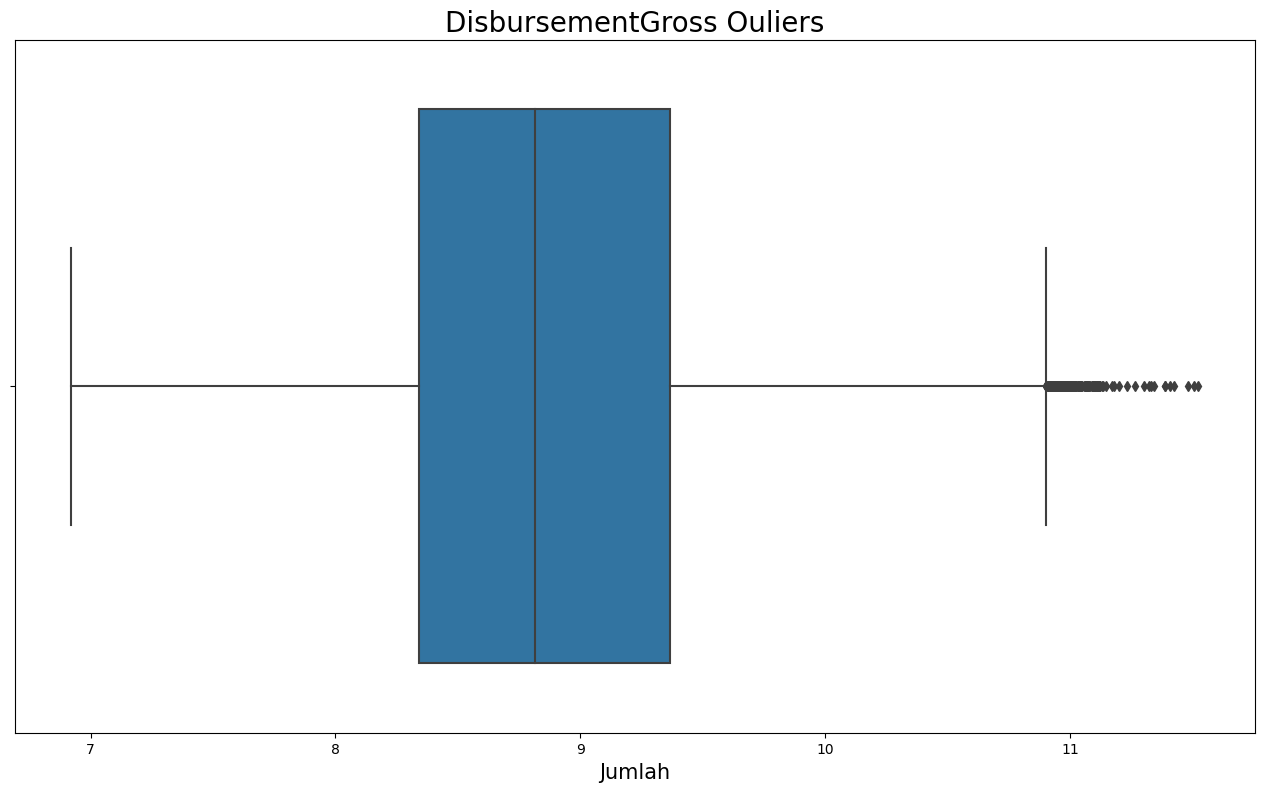

In [71]:
#kita cek lagi apakah masiha ada outliers
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df_SBA['DisbursementGross'])
plt.title('DisbursementGross Ouliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

Text(0.5, 0, 'Jumlah')

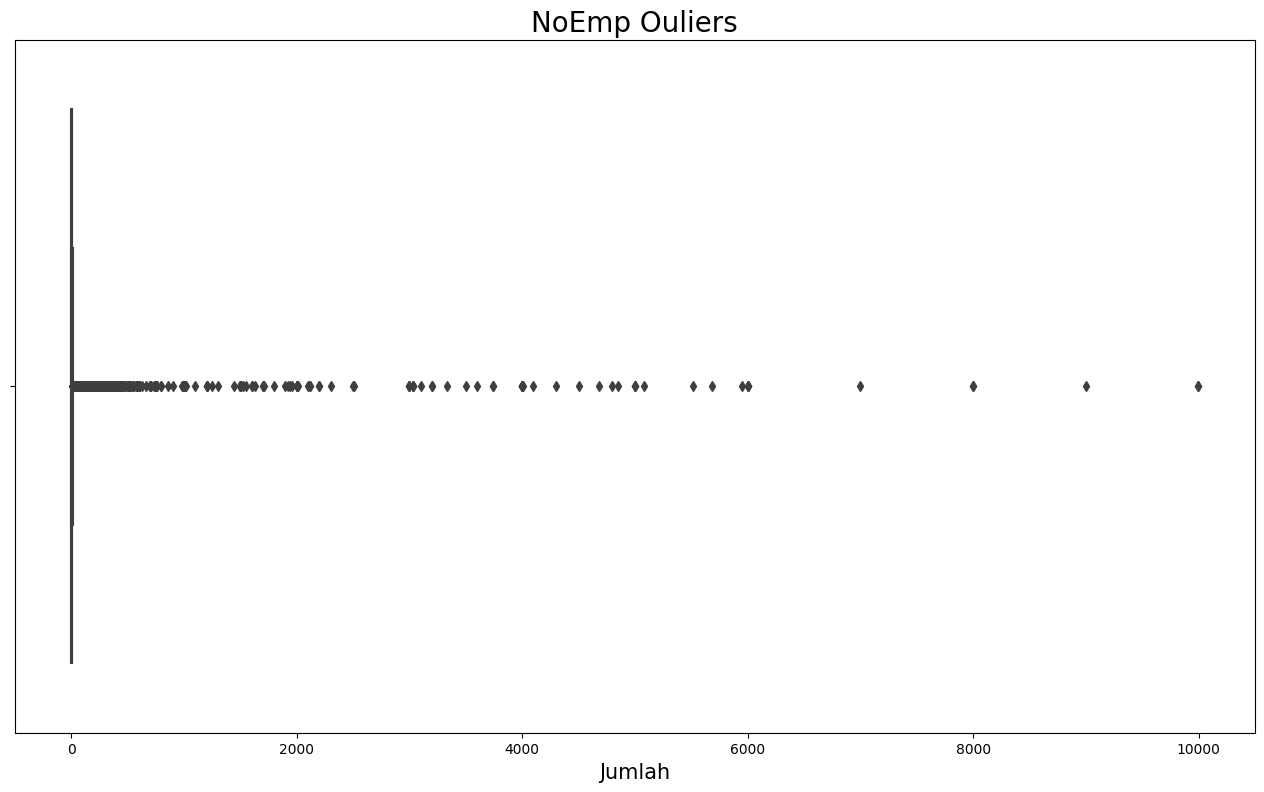

In [72]:
#kita cek ouliers pada kolom NoEmp
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df_SBA['NoEmp'])
plt.title('NoEmp Ouliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

In [73]:
#kita akan cek limit outliers dan berapa persen dari data kita yang melebihi limit tersebut
print(limit('NoEmp'))
print('-'*50)
print(percent_outliers('NoEmp'))

Lower Limit: -8.5
Lower Limit Extreme: -19.0
Upper Limit: 19.5
Upper Limit Extreme: 30.0
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extreme: 100.0 %
Upper Limit: 11.34907295551237 %
Upper Limit Extreme: 6.509226675070469 %
None


In [74]:
#pada kolom NoEmp, terdapat iput 0, aka saya anggap ini kesalahan, input, karena tidak mungkin sebuah perusahaan
#tidak memiliki karyawan
wrong_input = df_SBA[(df_SBA['NoEmp'] == 0)].index
df_SBA.drop(wrong_input, inplace=True)

menggunakan transformasi boxcox dilihat dari grafik skewnes yang lebih panjang disisi kanan dan nilai, untuk menjadikan data normal

In [75]:
#karena terdapat 11 % dari jumlah data yang kita punya, maka saya coba merubah datanya dengan menggunakan
#log transformation, karena jika ouliers dihilangkan sangat banyak sekali data yang hilang (10%)
df_SBA['NoEmp'] = st.boxcox(df_SBA['NoEmp'])[0]
df_SBA['NoEmp'].skew()

0.07024256062476626

In [76]:
#kita akan cek lagi limit outliers dan berapa persen dari data kita yang melebihi limit tersebut
print(limit('NoEmp'))
print('-'*50)
print(percent_outliers('NoEmp'))

Lower Limit: -0.9863164940271595
Lower Limit Extreme: -2.6134403633472227
Upper Limit: 3.3526804908263426
Upper Limit Extreme: 4.979804360146406
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extreme: 100.0 %
Upper Limit: 0.02951403914049792 %
Upper Limit Extreme: 0.0 %
None


In [77]:
#ternyata masih ada sekitar 0.02% outliers, karena jumlahnya terbilang kecil, maka kita drop saja
outliers3_drop = df_SBA[(df_SBA['NoEmp'] > 3.6)].index
df_SBA.drop(outliers3_drop, inplace=True)

Text(0.5, 0, 'Jumlah')

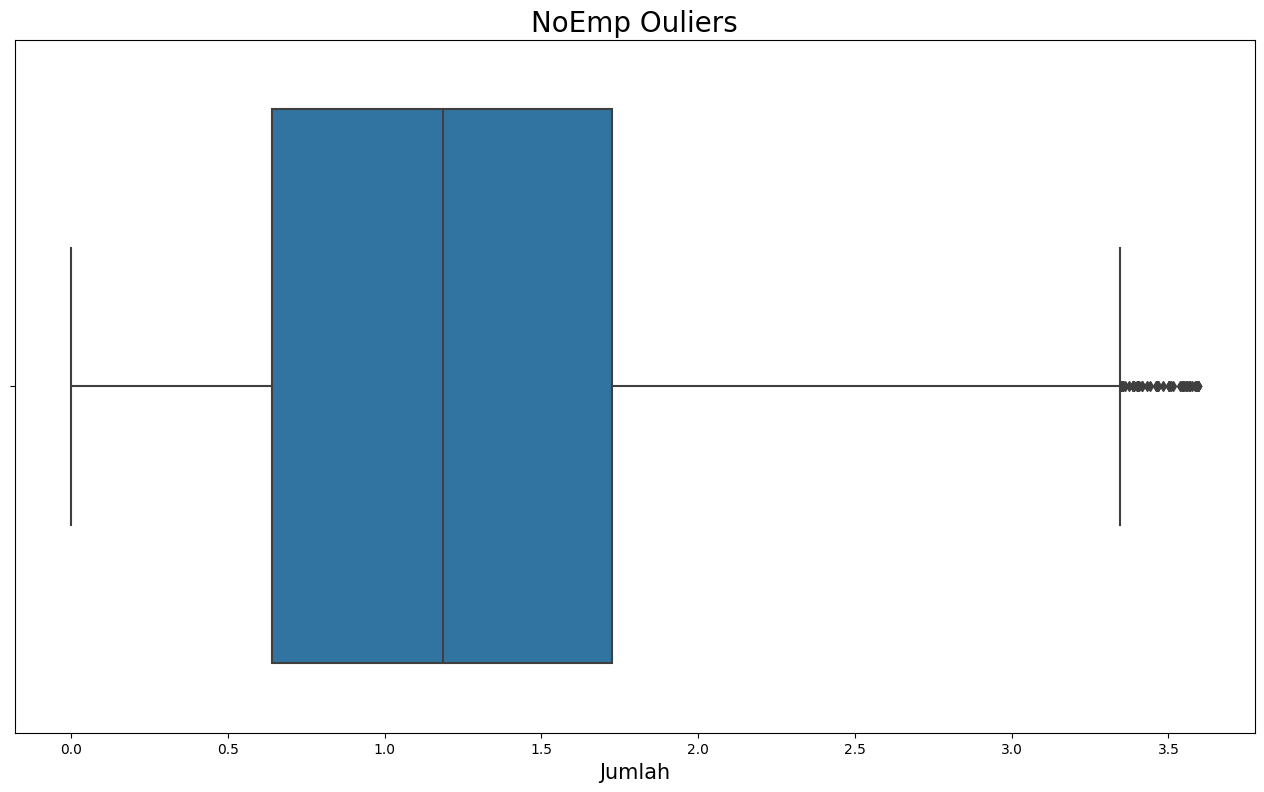

In [78]:
#kita cek ouliers pada kolom NoEmp
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df_SBA['NoEmp'])
plt.title('NoEmp Ouliers', fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

Text(0.5, 0, 'Bulan')

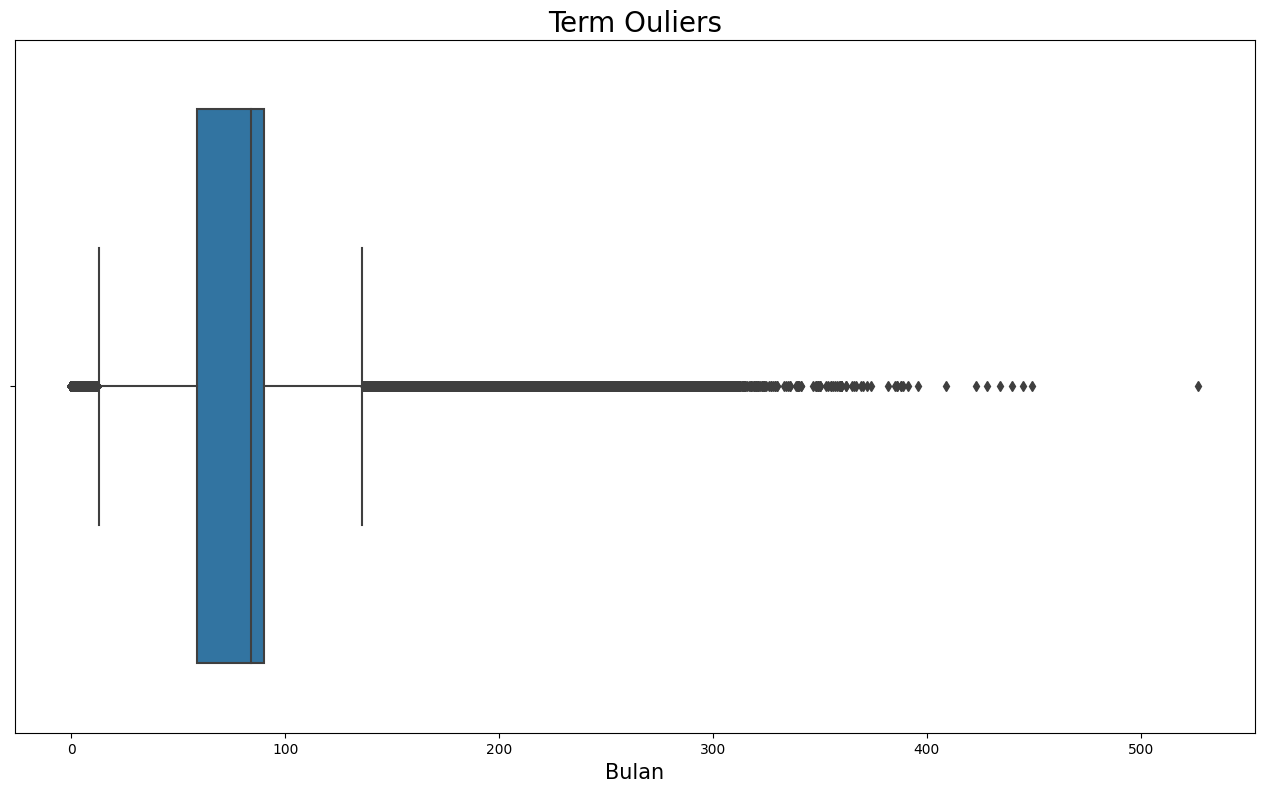

In [79]:
#kita cek ouliers pada kolom Term
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df_SBA['Term'])
plt.title('Term Ouliers', fontsize=20)
plt.xlabel('Bulan', fontsize=15)

In [80]:
#Karena terdapat data yang lama pinajamanya 0 bulan dan 43 tahun
#karena tidak mungkin ada waktu 0 dan 569 bulan (43 tahun)
#sedangkan pengambilan data yang kita punya hanya dari tahun 1987–2010 (23 tahun),
#sehingga minimal 5 tahun (75 bulan) atau maksimal 23 tahun (276 bulan)
wrong_input_2 = df_SBA[(df_SBA['Term'] < 75)].index
wrong_input_3 = df_SBA[(df_SBA['Term'] > 276)].index
df_SBA.drop(wrong_input_2, inplace=True)
df_SBA.drop(wrong_input_3, inplace=True)

Text(0.5, 0, 'Bulan')

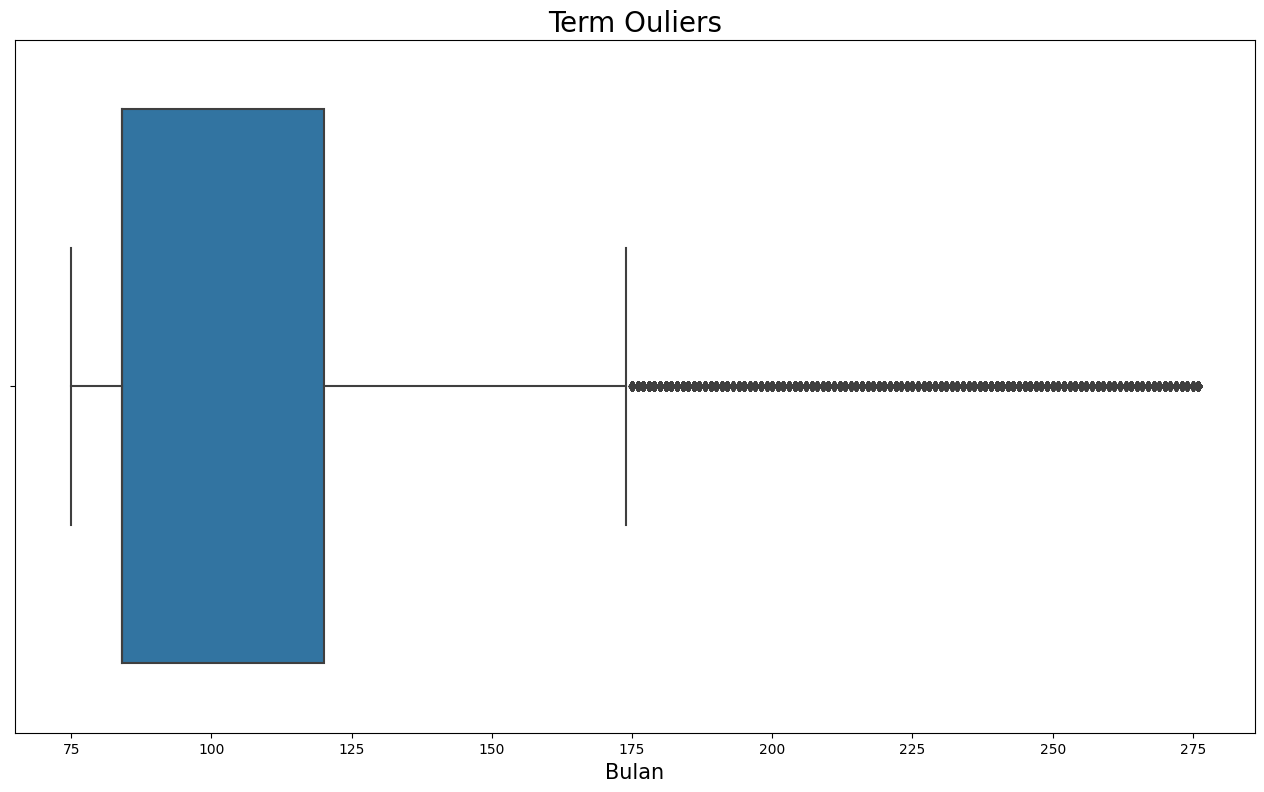

In [81]:
#kita cek lagi ouliers pada kolom Term
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df_SBA['Term'])
plt.title('Term Ouliers', fontsize=20)
plt.xlabel('Bulan', fontsize=15)

In [82]:
#kita akan cek lagi limit outliers dan berapa persen dari data kita yang melebihi limit tersebut
print(limit('Term'))
print('-'*50)
print(percent_outliers('Term'))

Lower Limit: 30.0
Lower Limit Extreme: -24.0
Upper Limit: 174.0
Upper Limit Extreme: 228.0
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extreme: 100.0 %
Upper Limit: 20.42460961364105 %
Upper Limit Extreme: 14.494783823432131 %
None


kita tidak akan drop outlier ini, karena selain jumlanya banyak (14%) ini belum tentu salah input, karena memang beberapa industri bisa mengambil jangka waktu pinjaman yang lama seperti oil & gas

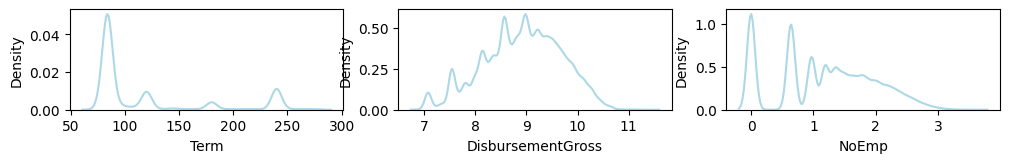

In [83]:
features = ['Term', 'DisbursementGross', 'NoEmp']

plt.figure(figsize=(12,6))

for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(df_SBA[features[i]], color='lightblue')
    plt.xlabel(features[i])

In [84]:
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256989 entries, 0 to 899161
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Term                256989 non-null  int64  
 1   NoEmp               256989 non-null  float64
 2   NewExist            256989 non-null  Int64  
 3   Is_CreatedJob       256989 non-null  int64  
 4   Is_RetainedJob      256989 non-null  int64  
 5   Is_Franchised       256989 non-null  int64  
 6   UrbanRural          256989 non-null  int64  
 7   RevLineCr           256989 non-null  float64
 8   LowDoc              256989 non-null  float64
 9   DisbursementGross   256989 non-null  float64
 10  MIS_Status          256989 non-null  object 
 11  StateSame           256989 non-null  int64  
 12  DaysToDisbursement  256989 non-null  object 
 13  Recession           256989 non-null  int64  
 14  SBA_AppvPct         256989 non-null  float64
 15  AppvDisbursed       256989 non-nul

In [85]:
df_SBA['DaysToDisbursement'] = df_SBA['DaysToDisbursement'].astype(int)

## Handling Imbalance

In [86]:
#Kita cek ratio target variabel
print(df_SBA.MIS_Status.value_counts())
print('-'*50)
print('MIS_Status (0): {} %'.format(df_SBA[(df_SBA['MIS_Status'] == 0)].shape[0]/df_SBA.shape[0]*100))
print('MIS_Status (1): {} %'.format(df_SBA[(df_SBA['MIS_Status'] == 1)].shape[0]/df_SBA.shape[0]*100))

P I F     245398
CHGOFF     11591
Name: MIS_Status, dtype: int64
--------------------------------------------------
MIS_Status (0): 0.0 %
MIS_Status (1): 0.0 %


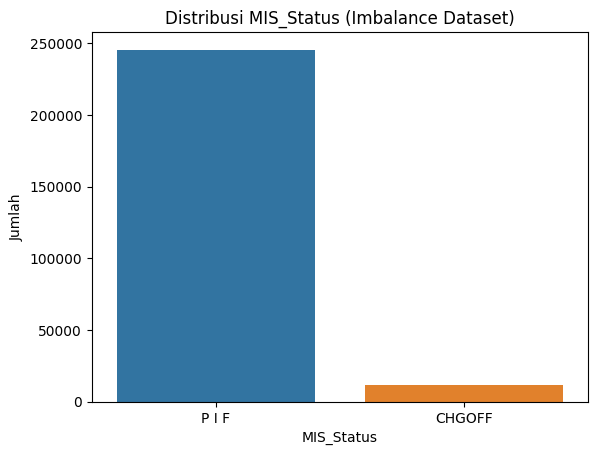

In [87]:
# Visualisasi Imbalance Dataset Sebelum Dibenahi
sns.countplot(x="MIS_Status", data=df_SBA)
plt.title("Distribusi MIS_Status (Imbalance Dataset)")
plt.xlabel("MIS_Status")
plt.ylabel("Jumlah")
plt.show()

bisa dilihat bahwa target variabel kita imbalance atau tidak seimbang, 0 (Tidak Default): 94.3% dan 1(Default): 4.6% sehingga kita akan menangani masalah ini, karena jika tidak model akan lebih cenderung memprediksi 0 karena lebih banyak dalam jumlah

In [88]:
df_SBA['MIS_Status'] = df_SBA['MIS_Status'].replace({'P I F': 0, 'CHGOFF': 1})
df_SBA['MIS_Status'] = df_SBA['MIS_Status'].astype(int)


In [89]:
df_SBA['MIS_Status'].value_counts()

0    245398
1     11591
Name: MIS_Status, dtype: int64

In [90]:
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256989 entries, 0 to 899161
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Term                256989 non-null  int64  
 1   NoEmp               256989 non-null  float64
 2   NewExist            256989 non-null  Int64  
 3   Is_CreatedJob       256989 non-null  int64  
 4   Is_RetainedJob      256989 non-null  int64  
 5   Is_Franchised       256989 non-null  int64  
 6   UrbanRural          256989 non-null  int64  
 7   RevLineCr           256989 non-null  float64
 8   LowDoc              256989 non-null  float64
 9   DisbursementGross   256989 non-null  float64
 10  MIS_Status          256989 non-null  int64  
 11  StateSame           256989 non-null  int64  
 12  DaysToDisbursement  256989 non-null  int64  
 13  Recession           256989 non-null  int64  
 14  SBA_AppvPct         256989 non-null  float64
 15  AppvDisbursed       256989 non-nul

In [91]:
df_SBA.describe()

,Term,NoEmp,NewExist,Is_CreatedJob,Is_RetainedJob,Is_Franchised,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,StateSame,DaysToDisbursement,Recession,SBA_AppvPct,AppvDisbursed
count,256989.000000,256989.000000,256989.0,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000,256989.000000
mean,118.836242,1.189871,0.2733,0.304285,0.572822,0.037488,0.850309,0.376973,0.057652,8.923814,0.045103,0.484939,127.338699,0.044982,0.685371,0.673052
std,57.049900,0.790481,0.445654,0.460105,0.494669,0.189955,0.624273,0.484629,0.233085,0.755888,0.207531,0.499774,211.296601,0.207266,0.187386,0.469099
min,75.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.921058,0.000000,0.000000,-567.000000,0.000000,0.050000,0.000000
25%,84.000000,0.640807,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.426480,0.000000,0.000000,30.000000,0.000000,0.500000,0.000000
50%,84.000000,1.187339,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,8.983450,0.000000,0.000000,61.000000,0.000000,0.750000,1.000000
75%,120.000000,1.788414,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,9.484691,0.000000,1.000000,131.000000,0.000000,0.850000,1.000000
max,276.000000,3.595018,1.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,11.408307,1.000000,1.000000,4029.000000,1.000000,1.000000,1.000000


In [92]:
y = df_SBA['MIS_Status']
X = df_SBA.drop(columns=['MIS_Status'], axis=1)

print(X.shape)
print(y.shape)

(256989, 15)
(256989,)


In [93]:
X = X.astype(np.float64)
y = y.astype(np.float64)

In [94]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
#Disini saya mengggunaka SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [96]:
print('Sebelum dilakukan SMOTE:', y_train.value_counts())
print('Setelah dilakukan SMOTE :', y_train_smote.value_counts())

Sebelum dilakukan SMOTE: 0.0    196331
1.0      9260
Name: MIS_Status, dtype: int64
Setelah dilakukan SMOTE : 0.0    196331
1.0    196331
Name: MIS_Status, dtype: int64


lakukan standarisasi pada fitur-fitur numerik dalam data pelatihan (X_train) menggunakan StandardScaler

## Feature Transformation


In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Term', 'NoEmp', 'DisbursementGross','DaysToDisbursement', 'SBA_AppvPct']] = scaler.fit_transform(X_train[['Term', 'NoEmp', 'DisbursementGross','DaysToDisbursement', 'SBA_AppvPct']])

lakukan standarisasi pada fitur-fitur numerik dalam data pelatihan (X_test) menggunakan StandardScaler

In [100]:
X_test[['Term', 'NoEmp', 'DisbursementGross','DaysToDisbursement', 'SBA_AppvPct']] = scaler.fit_transform(X_test[['Term', 'NoEmp', 'DisbursementGross','DaysToDisbursement', 'SBA_AppvPct']])

# STAGE 3

## Model Evaluasi

In [101]:
import warnings
warnings.filterwarnings("ignore")

In [102]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))



In [103]:
df_SBA.MIS_Status.value_counts(normalize=True)

0    0.954897
1    0.045103
Name: MIS_Status, dtype: float64

yang perlu diperhatikan False Positive, jika data balance lihat precision (memaksimalkan precision)
jika ingin mngurangi false negative bisa menggunakan recall

* Jika ROC-AUC pada data pelatihan jauh lebih tinggi daripada ROC-AUC pada data pengujian, ini bisa menjadi indikasi overfitting. Ini berarti model Anda mungkin "mengingat" data pelatihan dengan baik, tetapi tidak generalisasi dengan baik pada data baru.
* Jika ROC-AUC pada data pelatihan dan data pengujian hampir sama, model mungkin tidak mengalami overfitting atau underfitting, dan hasilnya cukup seimbang.
* Jika ROC-AUC pada data pengujian  dan  ROC-AUC pada data pelatihan jauh lebih rendah , ini bisa menjadi indikasi underfitting. Model mungkin terlalu sederhana dan tidak dapat menangkap pola dalam data.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.11
Recall (Test Set): 0.75
F1-Score (Test Set): 0.18
AUC (test-proba): 0.78
AUC (train-proba): 0.79
roc_auc (crossval train): 0.7898768259253341
roc_auc (crossval test): 0.7675960046247381


perbedaan roc_auc = 0.02

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)
eval_classification(logreg)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.09
Recall (Test Set): 0.77
F1-Score (Test Set): 0.16
AUC (test-proba): 0.76
AUC (train-proba): 0.77
roc_auc (crossval train): 0.7853641769510379
roc_auc (crossval test): 0.7559211243139593


In [ ]:
logreg.predict_proba(X_test)

array([[0.90306711, 0.09693289],
       [0.23396608, 0.76603392],
       [0.42806276, 0.57193724],
       ...,
       [0.93117487, 0.06882513],
       [0.46756134, 0.53243866],
       [0.91226296, 0.08773704]])

## k-Nearest Neighbor (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.65
Recall (Test Set): 0.25
F1-Score (Test Set): 0.36
AUC (test-proba): 0.75
AUC (train-proba): 0.98
roc_auc (crossval train): 0.9864614417905093
roc_auc (crossval test): 0.8348613821538965


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)


Accuracy (Test Set): 0.95
Precision (Test Set): 0.50
Recall (Test Set): 0.56
F1-Score (Test Set): 0.53
AUC (test-proba): 0.77
AUC (train-proba): 1.00
roc_auc (crossval train): 0.9999991693104666
roc_auc (crossval test): 0.7385421562147693


perbedaan roc_auc = 0.27

karena ROC-AUC pada data pelatihan jauh lebih tinggi daripada ROC-AUC pada data pengujian, ini bisa menjadi indikasi overfitting.

## Bagging : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.86
Recall (Test Set): 0.40
F1-Score (Test Set): 0.55
AUC (test-proba): 0.93
AUC (train-proba): 1.00
roc_auc (crossval train): 0.9999921801638767
roc_auc (crossval test): 0.9175877115141123


perbedaan roc_auc = 0.08

ROC-AUC pada data pelatihan dan data pengujian hampir sama, model mungkin tidak mengalami overfitting atau underfitting, dan hasilnya cukup seimbang.

## Boosting : Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.80
Recall (Test Set): 0.26
F1-Score (Test Set): 0.39
AUC (test-proba): 0.90
AUC (train-proba): 0.95
roc_auc (crossval train): 0.9482879178826055
roc_auc (crossval test): 0.9329864297280854


perbedaan roc_auc = 0.01

ROC-AUC pada data pelatihan dan data pengujian hampir sama, model mungkin tidak mengalami overfitting atau underfitting, dan hasilnya cukup seimbang. namun nilai recall yang menjadi pertimbangan metrics memiliki nilai yang sangat kecil.

## Boosting : XGBoost

In [104]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state = 42,class_weight = 'balanced')
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.33
Recall (Test Set): 0.57
F1-Score (Test Set): 0.42
AUC (test-proba): 0.89
AUC (train-proba): 0.98
roc_auc (crossval train): 0.9792024062937662
roc_auc (crossval test): 0.9447881727049714


perbedaan roc_auc = 0.03

ROC-AUC pada data pelatihan dan data pengujian hampir sama, model mungkin tidak mengalami overfitting atau underfitting, dan hasilnya cukup seimbang.

Insight dapat diambil dari hasil ini adalah bahwa model XGBoost memiliki kinerja yang baik dalam membedakan kelas positif dan negatif dengan AUC yang tinggi. Namun, ada ruang untuk peningkatan dalam hal presisi. Hasil presisi yang rendah mengindikasikan bahwa sebagian besar prediksi positif yang dibuat oleh model adalah salah, sehingga dapat menjadi area yang perlu diperbaiki.

## Confusion Metric

In [105]:
from sklearn.metrics import confusion_matrix

Ytrue = y_test
Ypred = pd.Series(xg.predict(X_test))

cm_xg = confusion_matrix(Ytrue, Ypred)
cm_xg

array([[46338,  2729],
       [  997,  1334]])

In [106]:
TP = cm_xg[0][0]
FN = cm_xg[1][0]
FP = cm_xg[0][1]
TN = cm_xg[1][1]

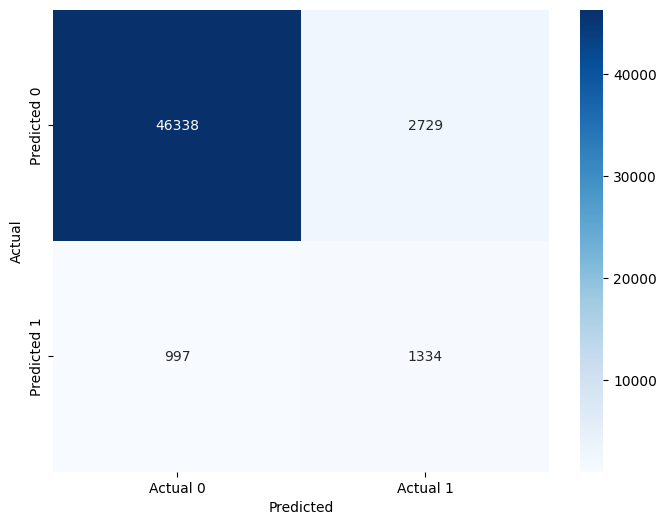

In [107]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung matriks kebingungan
cm = confusion_matrix(y_test, xg.predict(X_test))

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Menggunakan fmt='d' untuk angka tanpa notasi ilmiah
ax.xaxis.set_ticklabels(['Actual 0', 'Actual 1'])
ax.yaxis.set_ticklabels(['Predicted 0', 'Predicted 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K-Fold Cross Validation

In [108]:
#Check Train & Validation pada masing-masing iterasi
from sklearn.model_selection import KFold
import pandas as pd

kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf)

5

In [109]:
#Cross Validation in Validation Set Only
from sklearn.model_selection import cross_val_score
model = XGBClassifier()
result = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
result.mean()

0.9635196718575777

In [110]:
#Cross Validation in Train Set & Validation Set
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = XGBClassifier()
score = cross_validate(model, X, y, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (test): '+ str(score['test_score'].mean()))

roc_auc (train): 0.978870334857399
roc_auc (test): 0.9635196718575777


# Hyperparameter Tuning

In [ ]:
#import library
import numpy as np
from numpy.core.function_base import linspace
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier  # Menambahkan import XGBClassifier

#membuat sebuah dictionary yang berisi hyperparameter
hyperparameters ={
    'max_depth' :[int(x) for x in np.linspace(10,110,num =11)],
    'min_child_weight': [int(x) for x in np.linspace(1,20, num =11)],
    'gamma' : [float(x) for x in np.linspace (0,1, num = 11)],
    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

    'colsample_bytree' : [float(x) for x in np.linspace(0,1, num = 11)],
    'eta': [float(x) for x in np.linspace (0,1, num =11)],

    'lambda' : [float(x) for x in np.linspace(0,1, num = 11)],
    'alpha' : [float(x) for x in np.linspace(0,1, num = 11)]
}

#Inisialisasi
xg = XGBClassifier(random_state = 42, class_weight = 'balanced')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv =5, random_state = 42, scoring='recall')
xg_tuned.fit(X_train, y_train)

#predict dengan model yang telah di tuning & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.37
Recall (Test Set): 0.56
F1-Score (Test Set): 0.45
AUC (test-proba): 0.89
AUC (train-proba): 0.99
roc_auc (crossval train): 0.9795821315700162
roc_auc (crossval test): 0.9374953488774393


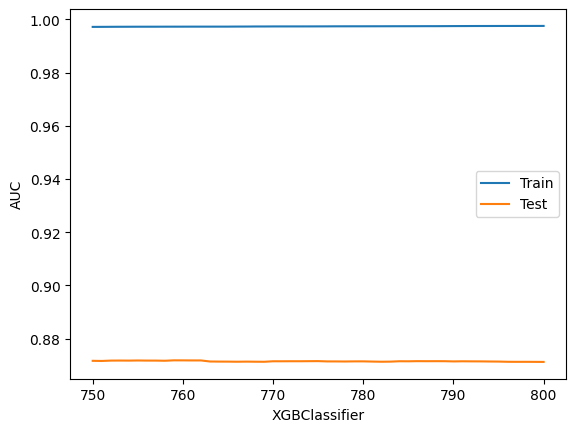

In [ ]:
# learning curve
# param_values = [int(x) for x in np.linspace(700, 800, 50)] # n_estimators
param_values = [int(x) for x in np.linspace(750, 800, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf


# Initialize training and test scores lists
train_scores = []
test_scores = []

# Train and evaluate the model with different hyperparameter values
for i in param_values:
    model = XGBClassifier(n_estimators=i)
    model.fit(X_train, y_train)

    # Evaluate on train set
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
    train_scores.append(train_auc)

    # Evaluate on test set
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    test_scores.append(test_auc)

# Plot learning curve
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.ylabel('AUC')
plt.xlabel('XGBClassifier')
plt.legend()
plt.show()

Berdasarkan kurva diatas dapat dilihat bahwa data train

## Feature Importance

### Train the model

In [111]:
xg = XGBClassifier(random_state = 42, class_weight = 'balanced')
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [112]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

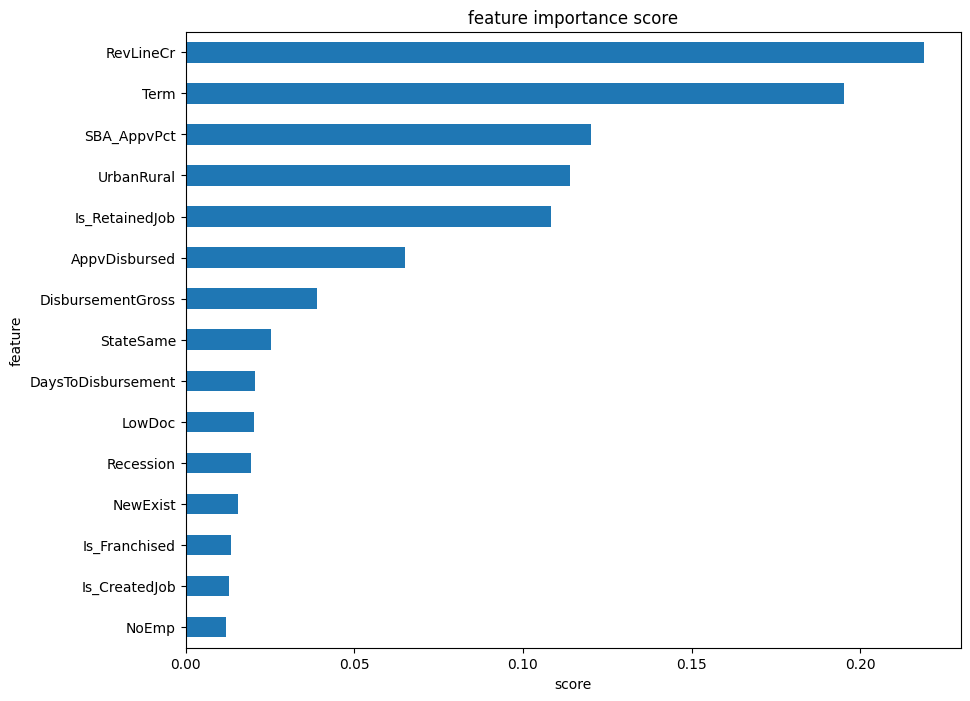

In [113]:
show_feature_importance(xg)

## SHAP VALUE

In [114]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.7 MB/s eta 0:00:00


### Draw the Plot

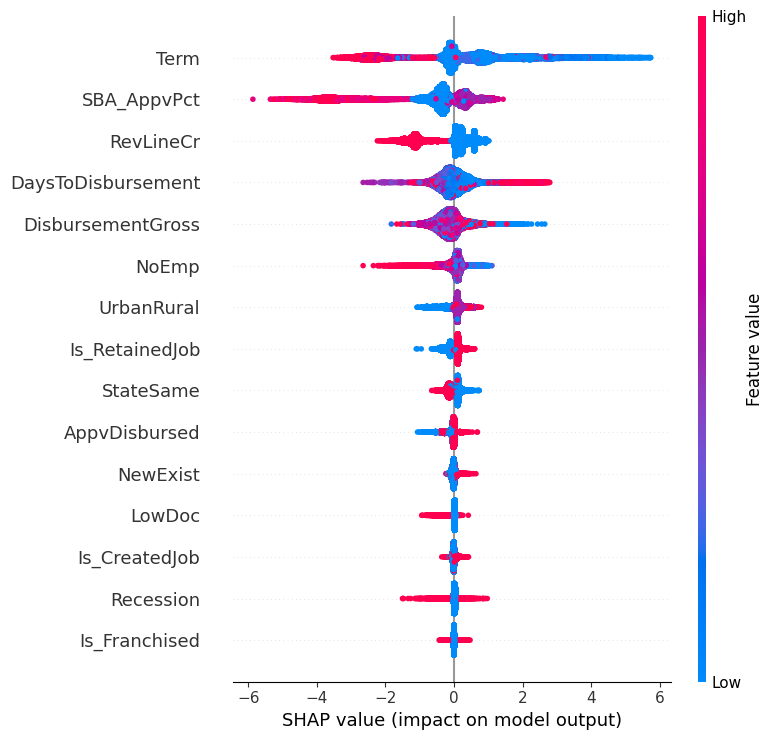

In [117]:
import shap
explainer = shap.TreeExplainer(xg)
shap_value = explainer.shap_values(X_test)
shap.summary_plot(shap_value, X_test)

dapat dilihat semakin merah warnanya makan semakin tinggi feature valuenya, semakin biru makan feature value semakin rendah

### Force Plot

In [116]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0][0], X_test.iloc[0,:].values)

NotFittedError: ignored

In [ ]:
df_SBA.head()